# XYZ CAB COMPANY project

## 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018.

### Hypotesis

- 1. Did the demand change over the years?
- 2. How is the demand by city?
- 3. How is the demand by age?
- 4. Is there any seasonability in the demand?
- 5. Is there any profitability diference among cities?
- 6. Is there any profitability diference among age range?
- 7. Are there customer retention in companies?




In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
from datetime import datetime, timedelta
import plotly.express as px
import plotly as pl
#pl.offline.init_notebook_mode(connected=True)


In [2]:
df_cab = pd.read_csv("Cab_Data.csv")
df_city = pd.read_csv("City.csv")
df_customer = pd.read_csv("Customer_ID.csv")
df_transaction = pd.read_csv("Transaction_ID.csv")

## CAB DATASET (Cab_Data.csv) : Details of transaction for 2 cab companies

In [3]:
print('Rows =',df_cab.shape[0], '  y   Columns = ', df_cab.shape[1])
df_cab.head()

Rows = 359392   y   Columns =  7


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [5]:
#Data types

df_cab.dtypes

#We can realise that we will have to do something with "Date of Travel"... 
#We need a format read as a date by Python

Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

In [31]:
#Nulls per column

df_cab.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [34]:
#Some metrics of the dataset in order to get familiar

df_cab.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


Date of travel - type conversion:

In [3]:
#Create a function to turn "Date of Travel" into a format useful or Python

def to_date_format(n):
    date_str =(datetime(1899,12,30) + timedelta(n-1)).strftime("%d-%m-%Y")
    date_date =  datetime.strptime(date_str, "%d-%m-%Y")
    return date_date

In [4]:
#Apply the function to all "Date of Travel" column

df_cab["Date of Travel"]=df_cab['Date of Travel'].apply(lambda x:to_date_format(x))


In [5]:
#Order the dataset by dates we modified and reset index

df_cab=df_cab.sort_values(by=['Date of Travel'])
df_cab=df_cab.reset_index(drop= True )

In [39]:
df_cab.head(2)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10001340,2016-01-01,Yellow Cab,WASHINGTON DC,10.2,202.54,135.864
1,10000640,2016-01-01,Yellow Cab,CHICAGO IL,15.6,374.66,209.664


In [43]:
#See the new different format of "Date of Travel"

df_cab.dtypes

#datetime

Transaction ID             int64
Date of Travel    datetime64[ns]
Company                   object
City                      object
KM Travelled             float64
Price Charged            float64
Cost of Trip             float64
dtype: object

## CITY DATASET (City.csv) : contains list of US cities, their population and number of cab users

In [9]:
print('Rows =',df_city.shape[0], '  y   Columns = ', df_city.shape[1])
df_city.head()

Rows = 20   y   Columns =  3


,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [49]:
#Data types

df_city.dtypes

# At first sight, it is necessary to turn "population" and "users" into INT/float to use these data

City          object
Population    object
Users         object
dtype: object

Population / Users - type conversion:

In [6]:
df_city['Population'] = [x.replace(',','') for x in df_city['Population']]
df_city['Users'] = [x.replace(',','') for x in df_city['Users']]
df_city['Population'] = df_city['Population'].astype(int)
df_city['Users'] = df_city['Users'].astype(int)


In [52]:
#Check new types

df_city.dtypes

City           object
Population    float64
Users         float64
dtype: object

## CUSTOMERS DATASET ("Customer_ID.csv") : this is a mapping table that contains a unique identifier which links the customer’s demographic details

In [11]:
print('Rows =',df_customer.shape[0], '  y   Columns = ', df_customer.shape[1])
df_customer.head()

Rows = 49171   y   Columns =  4


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [54]:
#Data types

df_customer.dtypes

#We dont have to change types

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

## TRANSACTION ID DATASET ("Transaction_ID.csv") : this is a mapping table that contains transaction to customer mapping and payment mode

In [12]:
print('Rows =',df_transaction.shape[0], '  y   Columns = ', df_transaction.shape[1])
df_transaction.head()

Rows = 440098   y   Columns =  3


,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [56]:
#Data types

df_transaction.dtypes

#We dont have to change types

Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object

## MAIN DATASET - MASTER DATA: I am going to create a dataset using the ones given, in order to work better.

In [433]:
df_main = df_cab.merge(df_transaction, on= 'Transaction ID').merge(df_customer, on ='Customer ID').merge(df_city, on = 'City')

## EDA
### Description of the dataset - df_main (master data)

In [434]:
df_main.sort_values(by="Date of Travel",inplace=True)
df_main=df_main.reset_index(drop= True )
df_main

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10001340,2016-01-01,Yellow Cab,WASHINGTON DC,10.20,202.54,135.86,52536,Card,Male,24,10606,418859,127001
1,10001254,2016-01-01,Yellow Cab,SILICON VALLEY,42.12,1342.05,520.60,13894,Card,Male,32,21898,1177609,27247
2,10001242,2016-01-01,Yellow Cab,SILICON VALLEY,18.02,658.65,240.03,14513,Card,Male,62,3892,1177609,27247
3,10000885,2016-01-01,Yellow Cab,NEW YORK NY,32.20,940.73,452.09,1698,Card,Male,23,22120,8405837,302149
4,10000961,2016-01-01,Yellow Cab,NEW YORK NY,19.04,634.46,253.61,85,Card,Male,19,19765,8405837,302149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10437121,2018-12-30,Pink Cab,NEW YORK NY,31.32,511.67,350.78,2157,Card,Female,24,11407,8405837,302149
359388,10434035,2018-12-30,Pink Cab,SILICON VALLEY,42.55,650.14,480.81,14382,Cash,Female,60,2613,1177609,27247
359389,10433131,2018-12-30,Pink Cab,BOSTON MA,27.27,370.20,324.51,59768,Cash,Female,25,24526,248968,80021
359390,10436747,2018-12-30,Pink Cab,CHICAGO IL,35.03,401.69,399.34,4225,Cash,Male,19,17877,1955130,164468


In [35]:
#Getting familiar with main dataset statistics

df_main.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Population,Users
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937,3.132198e+06,158365.582267
std,1.268058e+05,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482,3.315194e+06,100850.051020
min,1.000001e+07,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000,2.489680e+05,3643.000000
25%,1.011081e+07,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000,6.712380e+05,80021.000000
50%,1.022104e+07,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000,1.595037e+06,144132.000000
75%,1.033094e+07,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000,8.405837e+06,302149.000000
max,1.044011e+07,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000,8.405837e+06,302149.000000


In [16]:
#Nulls along the different columns of the datset

df_main.isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

In [36]:
#data types

df_main.dtypes

Transaction ID                 int64
Date of Travel        datetime64[ns]
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Customer ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)             int64
Population                     int64
Users                          int64
dtype: object

In [9]:
#Check if there are duplicates in the dataset. I consider duplicates, the ones that have the same ID 
#(Customer ID and Transaction ID)

df_main_2=df_main.drop_duplicates(subset=["Customer ID","Transaction ID"])

df_main_2.shape==df_main.shape

#There are not duplicates in df_main. 

True

### Exploratory analysis of some features

### City

Text(0.5, 0, 'City')

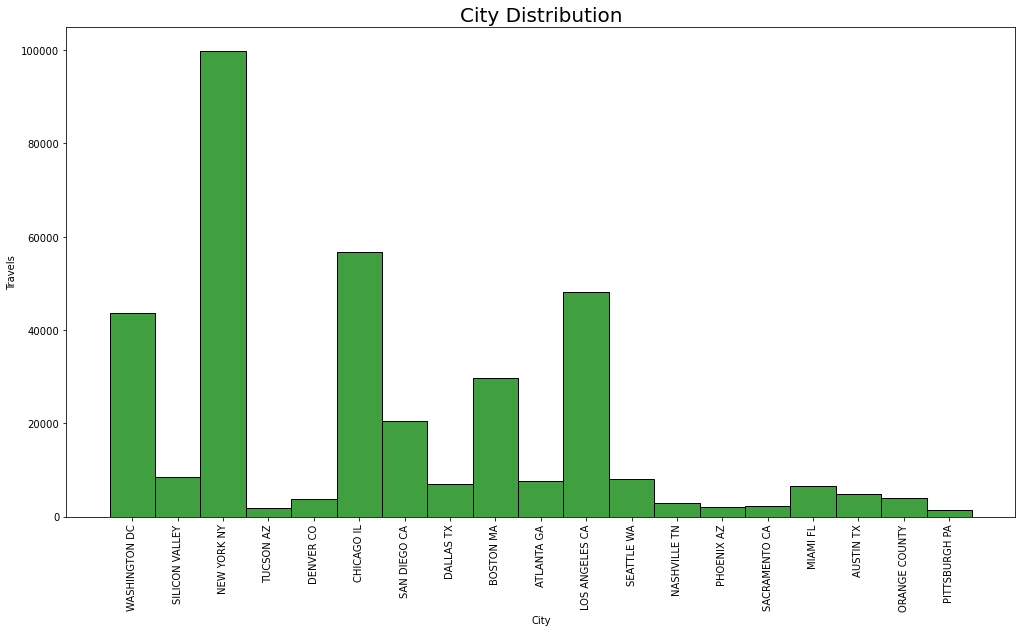

In [24]:
# travels along the years analized by city

plt.figure(figsize=(17,9))



ax=sns.histplot(data=df_main, x="City",bins=40, color= 'g')
plt.setp( ax.get_xticklabels(),rotation=90)
plt.title('City Distribution', fontsize=20)
plt.ylabel('Travels')
plt.xlabel('City')

#NewYork is by far the city with more travels

### Payment mode

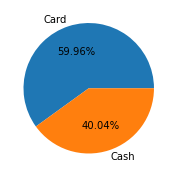

Card    59.963494
Cash    40.036506
Name: Payment_Mode, dtype: float64


In [26]:
#Payment mode

pay_mode_per=df_main["Payment_Mode"].value_counts()/df_main.shape[0]*100

labels=("Card","Cash")

fig = plt.figure(figsize=(5,3)); ax = plt.axes()

ax.pie(pay_mode_per, labels = labels ,autopct='%1.2f%%')
plt.show()

print(pay_mode_per)

### Gender

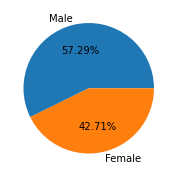

Male      57.294542
Female    42.705458
Name: Gender, dtype: float64


In [28]:
#Gender

gender_per=df_main["Gender"].value_counts()/df_main.shape[0]*100

labels=("Male","Female")

fig = plt.figure(figsize=(5,3)); ax = plt.axes()

ax.pie(gender_per, labels = labels ,autopct='%1.2f%%')
plt.show()

print(gender_per)

### Age

Text(0.5, 0, 'Age')

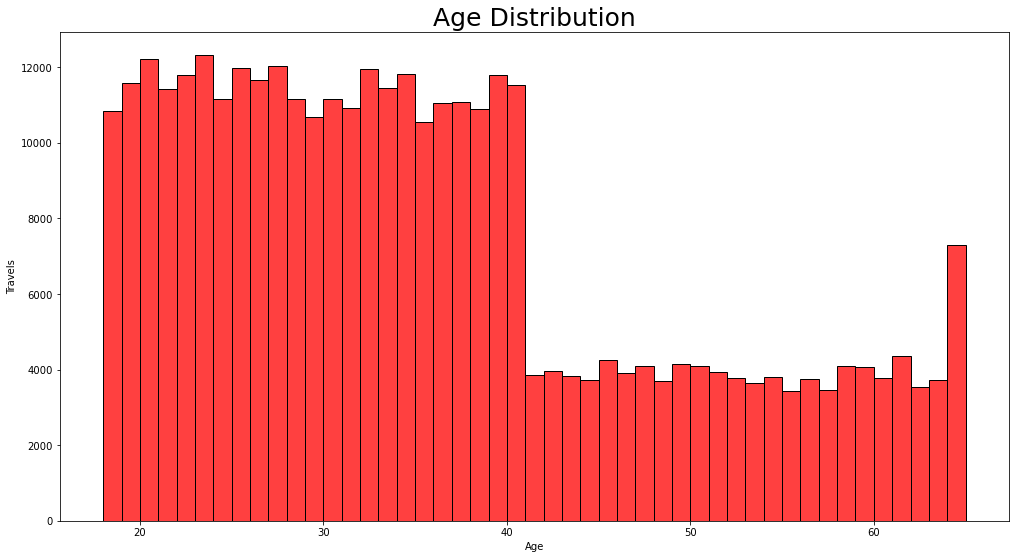

In [81]:
#Age would be an important feature

plt.figure(figsize=(17,9))
sns.histplot(data=df_main, x='Age', bins=47,color="r")
plt.title('Age Distribution', fontsize=25)
plt.ylabel('Travels')
plt.xlabel('Age')

#At 41 y.o. there is a huge drop in travels.

### Price Charged

Text(0.5, 0, 'Price Charged')

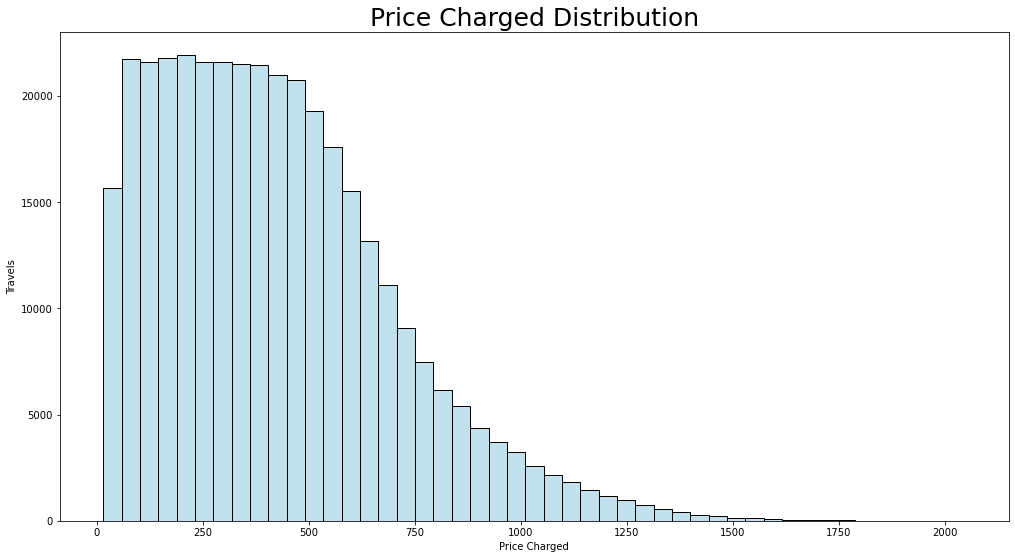

In [82]:
#Distribution of Price Charged

plt.figure(figsize=(17,9))
sns.histplot(data=df_main, x='Price Charged', bins=47,color="lightblue")
plt.title('Price Charged Distribution', fontsize=25)
plt.ylabel('Travels')
plt.xlabel('Price Charged')



### Cost of Trip

Text(0.5, 0, 'Cost of Trip')

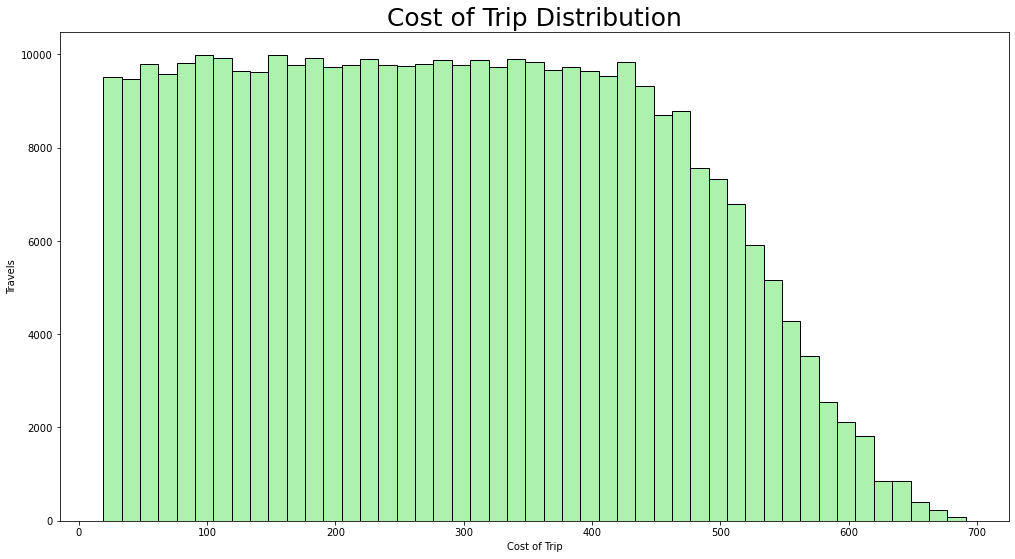

In [88]:
#Distribution of Cost per Trip

plt.figure(figsize=(17,9))
sns.histplot(data=df_main, x='Cost of Trip',bins=47,color="lightgreen")
plt.title('Cost of Trip Distribution', fontsize=25)
plt.ylabel('Travels')
plt.xlabel('Cost of Trip')




### Creation of new features to deepen de analysis: Month, Year, Quarter and Season

In [435]:
#Creation of new columns month and year, to see if there is any relation of travels and any of them.

df_main['Month'] = pd.DatetimeIndex(df_main['Date of Travel']).month_name()
df_main['Year'] = pd.DatetimeIndex(df_main['Date of Travel']).year
df_main['Month_int'] = pd.DatetimeIndex(df_main['Date of Travel']).month  


In [436]:
#I also going to create a seasonal column, to see the stationary influence 


def season_of_date(date):
    year = str(date.year)
    seasons = {'spring': pd.date_range(start='21/03/'+year, end='20/06/'+year),
               'summer': pd.date_range(start='21/06/'+year, end='22/09/'+year),
               'autumn': pd.date_range(start='23/09/'+year, end='20/12/'+year)}
    if date in seasons['spring']:
        return 'spring'
    if date in seasons['summer']:
        return 'summer'
    if date in seasons['autumn']:
        return 'autumn'
    else:
        return 'winter'
    
df_main["Season"]=df_main["Date of Travel"].apply(season_of_date)

In [437]:
#also, I think that maybe adding "Quarter" column, may produce some interesting insights

def quarter_of_date(date):
    year = str(date.year)
    seasons = {'Q1': pd.date_range(start='01/01/'+year, end='31/03/'+year),
               'Q2': pd.date_range(start='01/04/'+year, end='30/06/'+year),
               'Q3': pd.date_range(start='01/07/'+year, end='30/09/'+year)}
    if date in seasons['Q1']:
        return 'Q1'
    if date in seasons['Q2']:
        return 'Q2'
    if date in seasons['Q3']:
        return 'Q3'
    else:
        return 'Q4'
    
df_main["Quarter"]=df_main["Date of Travel"].apply(quarter_of_date)

In [32]:
def add_value_labels1(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.0f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va, fontsize=12)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
#add_value_labels1(ax)

In [34]:
seas_year_main=df_main.groupby(['Year', 'Season'])['Transaction ID'].count().to_frame("seas_year_main")
seas_year_main.reset_index(inplace=True)

seas_year_main_16=seas_year_main.loc[seas_year_main.Year==2016].set_index("Season").drop("Year",axis=1)
seas_year_main_17=seas_year_main.loc[seas_year_main.Year==2017].set_index("Season").drop("Year",axis=1)
seas_year_main_18=seas_year_main.loc[seas_year_main.Year==2018].set_index("Season").drop("Year",axis=1)


In [35]:
seas_year_main_16["2016"]=seas_year_main_16.seas_year_main
seas_year_main_16["2017"]=seas_year_main_17.seas_year_main
seas_year_main_16["2018"]=seas_year_main_18.seas_year_main
seas_year_main_16.drop("seas_year_main",inplace=True,axis=1)


In [36]:
#index_season=["1_Winter","2_Spring","3_Summer","4_Autumn"]
#seas_year_main_16["Season"]=index_season
#seas_year_main_16.set_index("Season",inplace=True)
seas_year_main_16.rename(index={"autumn":"4_Autumn","spring":"2_Spring","summer":"3_Summer","winter":"1_Winter"},inplace=True)
seas_year_main_16.sort_values("Season",inplace=True)

### Travels per quarter and season

Text(0.5, 0, 'Season')

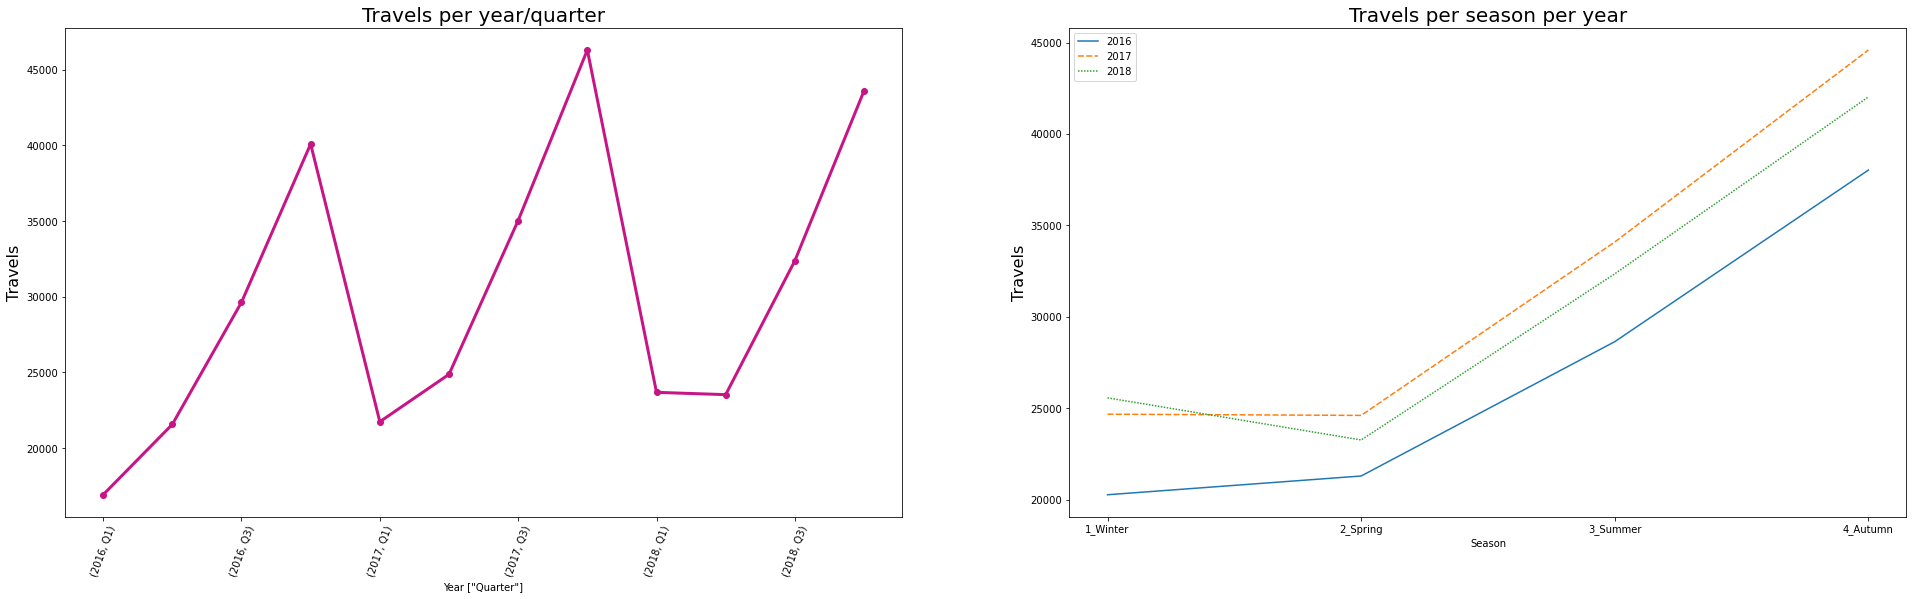

In [38]:
#Checking tendencies in quantity of travels over the dataset years (per quarter)

plt.figure(figsize=(33,9))

plt.subplot(1,2,1)

q_year_main=df_main.groupby(['Year', 'Quarter'])['Transaction ID'].count()

q_year_main.plot.line(color = 'mediumvioletred',label='Travels per year/quarter',linewidth=3, marker='o')
plt.xticks(rotation =70)
plt.ylabel('Travels', fontsize=16)
plt.title('Travels per year/quarter',fontsize=20)
plt.xlabel('Year ["Quarter"]')

plt.subplot(1,2,2)
sns.lineplot(data=seas_year_main_16)
plt.ylabel('Travels', fontsize=16)
plt.title('Travels per season per year',fontsize=20)
plt.xlabel('Season')
#fig_2=seas_year_main.Profit.resample('Y').sum().plot.line(color = 'coral',label='Pink Cab Company',linewidth=3, marker='o')
#plt.ylabel('Profit [Millions]', fontsize=16)
#plt.title('Annual Profits',fontsize=20)
#plt.xlabel('Year')


Talking about the relation between quarter of the year, and quantity of travels, we can see that the tendency is very similar over the years. It starts at the lowest point of the year Q1 - January - February - March, and the quantity of travels grows to the max point in Q4 - October - November - December.

The seasonability is clear and it is similar over the years. The year begins at a very low winter season, with 20000-25000 travels, spring is  similar, and after spring season, it starts growing till  a very high point in autumn.


### New feature - Profit

This feature is going to be really important in out posterior analysis

In [438]:
#Time to add a new feature, that is gonna be very important for our analysis 

df_main["Profit_per_travel"]=df_main["Price Charged"]-df_main["Cost of Trip"]


Text(0.5, 0, 'Profit_per_travel')

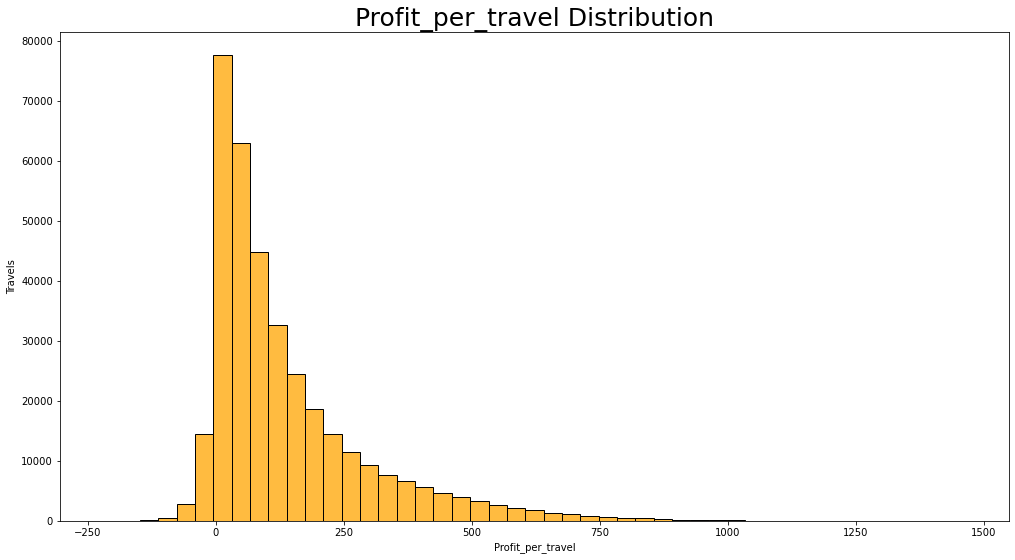

In [93]:
#Distribution of profit per travel

plt.figure(figsize=(17,9))
sns.histplot(data=df_main, x='Profit_per_travel',bins=47,color="orange")
plt.title('Profit_per_travel Distribution', fontsize=25)
plt.ylabel('Travels')
plt.xlabel('Profit_per_travel')

### Relation between KM Travelled and Cost of Trip - Price Charged - Profit per travel

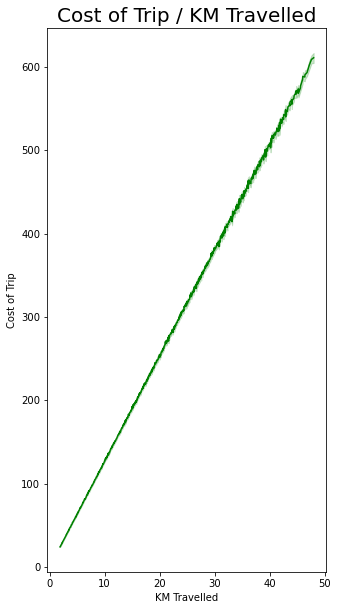

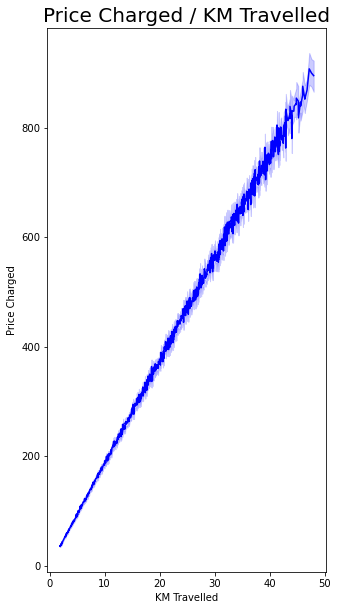

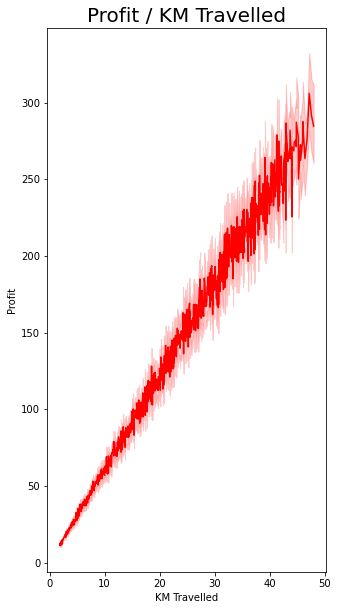

In [19]:
#We are plotting some important features because of its impact on the final decision. We are going to relate KM Travelled
#with some other features.

plt.figure(figsize=(17,10))

plt.subplot(1,3,1)

sns.lineplot(data=df_main, x="KM Travelled",y='Cost of Trip', color= 'green')
plt.title('Cost of Trip / KM Travelled', fontsize=20)
plt.xlabel('KM Travelled')
plt.ylabel('Cost of Trip')
plt.show()



plt.figure(figsize=(17,10))

plt.subplot(1,3,2)

sns.lineplot(data=df_main, x="KM Travelled",y='Price Charged', color= 'blue')
plt.title('Price Charged / KM Travelled', fontsize=20)
plt.xlabel('KM Travelled')
plt.ylabel('Price Charged')
plt.show()



plt.figure(figsize=(17,10))

plt.subplot(1,3,3)

sns.lineplot(data=df_main, x="KM Travelled",y='Profit_per_travel', color= 'red')
plt.title('Profit / KM Travelled', fontsize=20)
plt.xlabel('KM Travelled')
plt.ylabel('Profit')
plt.show()

### Check if there are outliers, specially in features we are going to use to make the analysis and comparison between companies.

<AxesSubplot:xlabel='Profit_per_travel', ylabel='Company'>

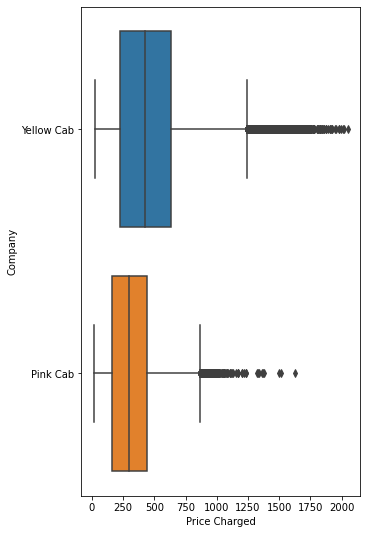

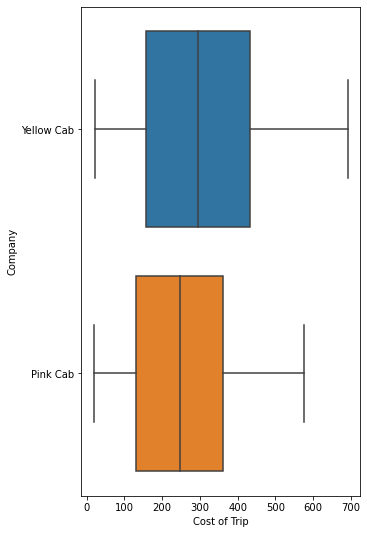

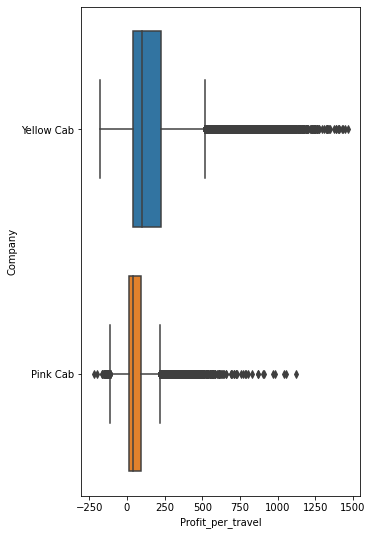

In [136]:
plt.figure(figsize=(17,9))

plt.subplot(1,3,1)
sns.boxplot(data = df_main, y = 'Company', x = "Price Charged", dodge=False)

plt.figure(figsize=(17,9))

plt.subplot(1,3,2)
sns.boxplot(data = df_main, y = 'Company', x = "Cost of Trip", dodge=False)

plt.figure(figsize=(17,9))

plt.subplot(1,3,3)
sns.boxplot(data = df_main, y = 'Company', x = "Profit_per_travel", dodge=False)


According to the boxplots, there are some "outliers", but I will keep them in this stage at least. I will analyse the inclusion of them for model.

### Correlation in features 

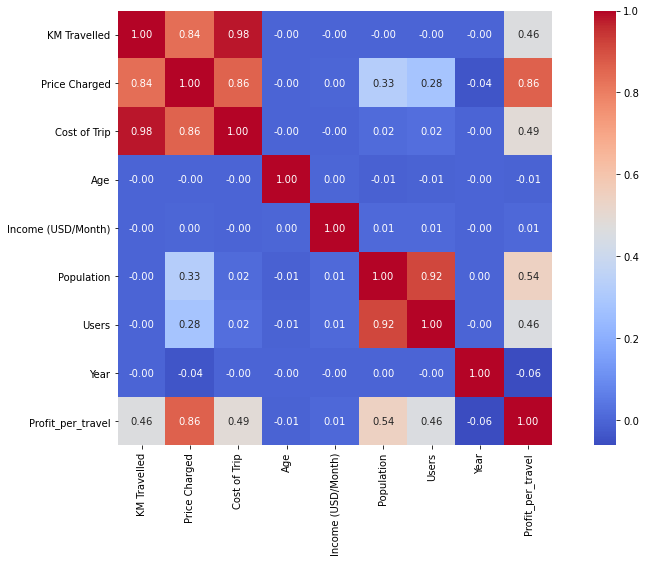

In [68]:
#Correlation among important features for analysis

df_main_corr=df_main.drop(["Transaction ID","Customer ID","Travel"],axis=1)

plt.rcParams['figure.figsize'] = (15,8)
corr = df_main_corr.corr()
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
           cmap= 'coolwarm')
plt.show()

In the correlation chart above, we can realise some important insights.

- As expected, the cost of trip has close relation with KM travelled.

- A little bit obvious, but the price charged has close relation with the cost of trip.

- The profit per travelhas certain relation with the population of the city.


### YELLOW CAB V/S PINK CAB: Analysis of both companies

First, I think that will be useful to split the main dataset (df_main) into two datasets, one for each company.

In [439]:
#we are going to split the ages into ranges to deep into analysis

ranges=[17,25,40,60,66]

df_main["age_range"]=pd.cut(df_main.Age,bins= ranges)



In [397]:
#Yellow Cab company dataset

df_yellow = df_main.loc[df_main.Company=="Yellow Cab"]
df_yellow["profit_per_travel"]=df_yellow["Price Charged"]-df_yellow["Cost of Trip"]

#Pink Cab company dataset

df_pink = df_main.loc[df_main.Company=="Pink Cab"]
df_pink["profit_per_travel"]=df_pink["Price Charged"]-df_pink["Cost of Trip"]




<ipython-input-397-adb5cb03b7ad>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yellow["profit_per_travel"]=df_yellow["Price Charged"]-df_yellow["Cost of Trip"]
<ipython-input-397-adb5cb03b7ad>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pink["profit_per_travel"]=df_pink["Price Charged"]-df_pink["Cost of Trip"]
<ipython-input-397-adb5cb03b7ad>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [ ]:
### print('Rows =',df_yellow.shape[0], '  y   Columns = ', df_yellow.shape[1])
df_yellow.head()

In [25]:
print('Rows =',df_pink.shape[0], '  y   Columns = ', df_pink.shape[1])
df_pink.head()

Rows = 84711   y   Columns =  20


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Travel,Month,Year,Season,Quarter,Profit_per_travel
19,10000375,2016-01-01,Pink Cab,WASHINGTON DC,3.03,33.57,30.300,51011,Cash,Male,53,24173,418859,127001,359392,January,2016,winter,Q1,3.270
21,10000070,2016-01-01,Pink Cab,DENVER CO,7.02,61.30,82.836,30718,Cash,Male,52,20255,754233,12421,359392,January,2016,winter,Q1,-21.536
22,10000379,2016-01-01,Pink Cab,WASHINGTON DC,20.58,241.78,226.380,52733,Card,Male,36,24748,418859,127001,359392,January,2016,winter,Q1,15.400
23,10000050,2016-01-01,Pink Cab,CHICAGO IL,10.20,165.77,116.280,3125,Cash,Male,25,9562,1955130,164468,359392,January,2016,winter,Q1,49.490
24,10000060,2016-01-01,Pink Cab,CHICAGO IL,35.34,500.22,395.808,3330,Card,Male,46,5216,1955130,164468,359392,January,2016,winter,Q1,104.412


In [41]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

comparison = df_main.groupby(['Company', 'Year'])["Profit_per_travel","Price Charged","Cost of Trip"].sum()
comparison

Profit_per_travel  Price Charged  Cost of Trip
Company    Year                                                
Pink Cab   2016         1739882.63     7986269.04    6246386.41
           2017         2015100.66     9530736.47    7515635.81
           2018         1552345.04     8811245.82    7258900.78
Yellow Cab 2016        14073886.48    38833629.82   24759743.34
           2017        16464267.14    45582913.86   29118646.72
           2018        13482219.55    41437343.51   27955123.96

### Profit, Profit margin, Price and Cost along the years in both companies

In [42]:
comparison["Profit_margin"]=comparison["Profit_per_travel"]/comparison["Price Charged"]
comparison

Profit_per_travel  Price Charged  Cost of Trip  Profit_margin
Company    Year                                                               
Pink Cab   2016         1739882.63     7986269.04    6246386.41           0.22
           2017         2015100.66     9530736.47    7515635.81           0.21
           2018         1552345.04     8811245.82    7258900.78           0.18
Yellow Cab 2016        14073886.48    38833629.82   24759743.34           0.36
           2017        16464267.14    45582913.86   29118646.72           0.36
           2018        13482219.55    41437343.51   27955123.96           0.33

In [43]:
#price_comp_y=df_main.pivot_table('Price Charged', index='Year', columns='Company', aggfunc=sum)
#cost_comp_y=df_main.pivot_table('Cost of Trip', index='Year', columns='Company', aggfunc=sum)
profit_comp_y=df_main.pivot_table('Profit_per_travel', index='Year', columns='Company', aggfunc=sum)

In [38]:
profit_comp_y

Company,Pink Cab,Yellow Cab
Year,,
2016,1739882.63,14073886.48
2017,2015100.66,16464267.14
2018,1552345.04,13482219.55


### Anual profits 

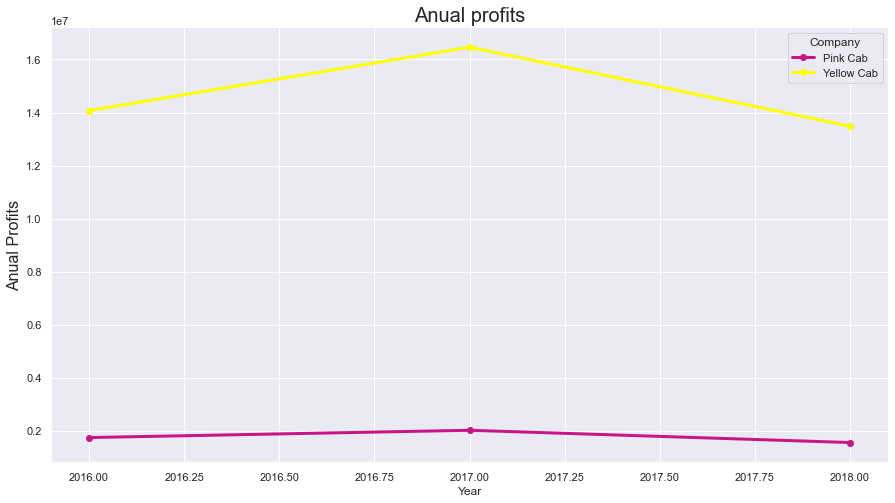

In [49]:
sns.set(rc = {'figure.figsize':(15,8)})

profit_comp_y.plot.line(color = ('mediumvioletred',"yellow"),label='Travels per year/quarter',linewidth=3, marker='o')
plt.ylabel('Anual Profits', fontsize=16)
plt.title('Anual profits',fontsize=20)
plt.xlabel('Year')
plt.show()

It is clear that Yellow Cab are highly superior in profits than Pink Cab. This is talking about anually, and for the whole business. Now we are going to analyse costs, income and profit per KM. This would be an interesting point of view.

In [440]:
df_main["Cost_per_km"]=df_main["Cost of Trip"]/df_main["KM Travelled"]
df_main["Price_per_km"]=df_main["Price Charged"]/df_main["KM Travelled"]
df_main["Profit_per_km"]=df_main["Profit_per_travel"]/df_main["KM Travelled"]

In [45]:
price_comp_y_km=df_main.pivot_table('Price_per_km', index='Year', columns='Company', aggfunc="mean")
cost_comp_y_km=df_main.pivot_table('Cost_per_km', index='Year', columns='Company', aggfunc="mean")
profit_comp_y_km=df_main.pivot_table('Profit_per_km', index='Year', columns='Company', aggfunc="mean")

### Price, Cost and Profit per km

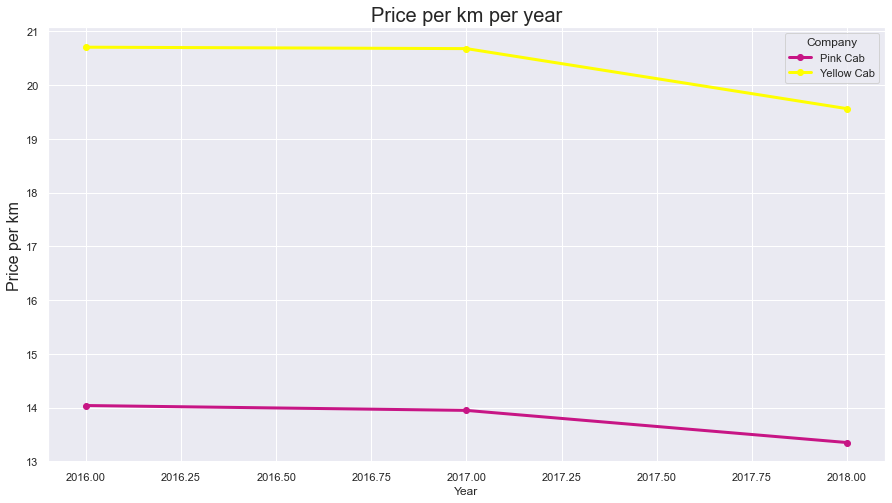

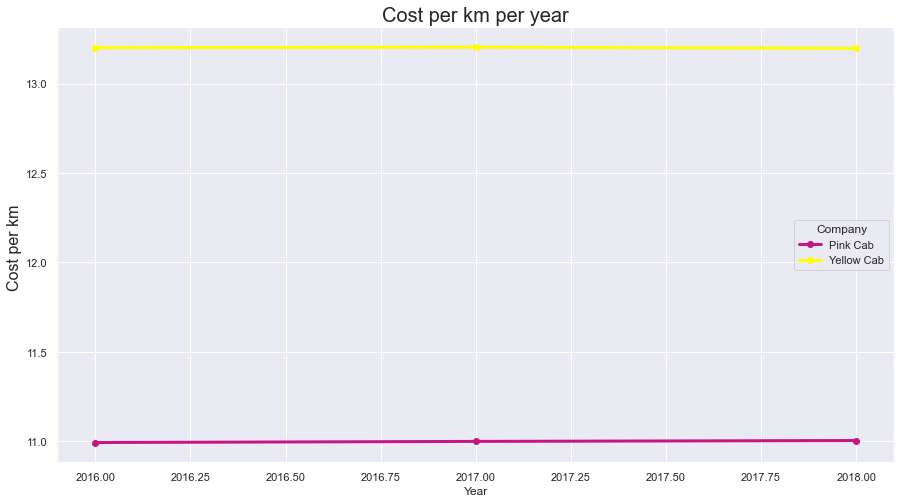

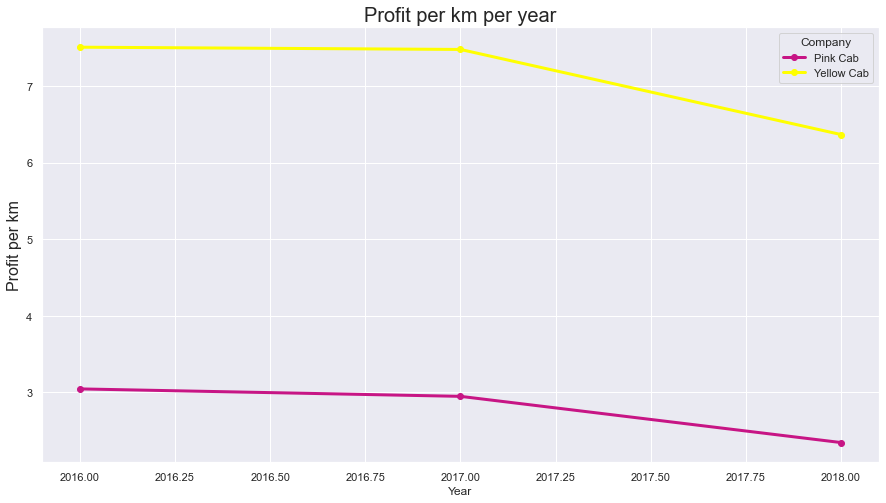

In [73]:
sns.set(rc = {'figure.figsize':(15,8)})

price_comp_y_km.plot.line(color = ('mediumvioletred',"yellow"),label='Price per km per year',linewidth=3, marker='o')
plt.ylabel('Price per km', fontsize=16)
plt.title('Price per km per year',fontsize=20)
plt.xlabel('Year')
plt.show()

cost_comp_y_km.plot.line(color = ('mediumvioletred',"yellow"),label='Cost per km per year',linewidth=3, marker='o')
plt.ylabel('Cost per km ', fontsize=16)
plt.title('Cost per km per year',fontsize=20)
plt.xlabel('Year')
plt.show()

profit_comp_y_km.plot.line(color = ('mediumvioletred',"yellow"),label='Profit per km per year',linewidth=3, marker='o')
plt.ylabel('Profit per km', fontsize=16)
plt.title('Profit per km per year',fontsize=20)
plt.xlabel('Year')
plt.show()

Analysing PRICE, COST and PROFIT at KM level, Yellow Cab Company is still highly superior.

Now, the idea is to make a similar analysis over quarters, to see the fluctuations more detailed

In [46]:
# Quarterly profits

profit_comp_q=df_main.pivot_table('Profit_per_travel', index=["Year",'Quarter'], columns='Company', aggfunc=sum)


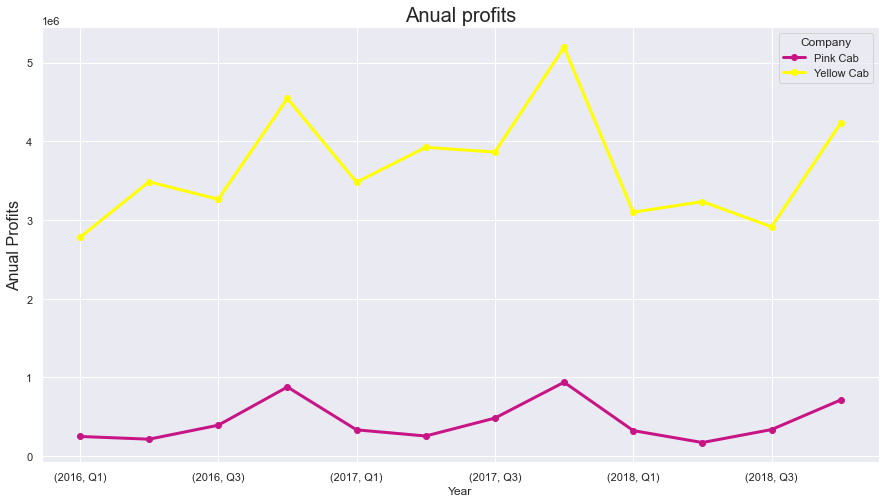

In [51]:
sns.set(rc = {'figure.figsize':(15,8)})

profit_comp_q.plot.line(color = ('mediumvioletred',"yellow"),label='Travels per year/quarter',linewidth=3, marker='o')
plt.ylabel('Anual Profits', fontsize=16)
plt.title('Anual profits',fontsize=20)
plt.xlabel('Year')
plt.show()

In [47]:
price_comp_q_km=df_main.pivot_table('Price_per_km', index=['Year',"Quarter"], columns='Company', aggfunc="mean")
cost_comp_q_km=df_main.pivot_table('Cost_per_km', index=['Year',"Quarter"], columns='Company', aggfunc="mean")
profit_comp_q_km=df_main.pivot_table('Profit_per_km', index=['Year',"Quarter"], columns='Company', aggfunc="mean")

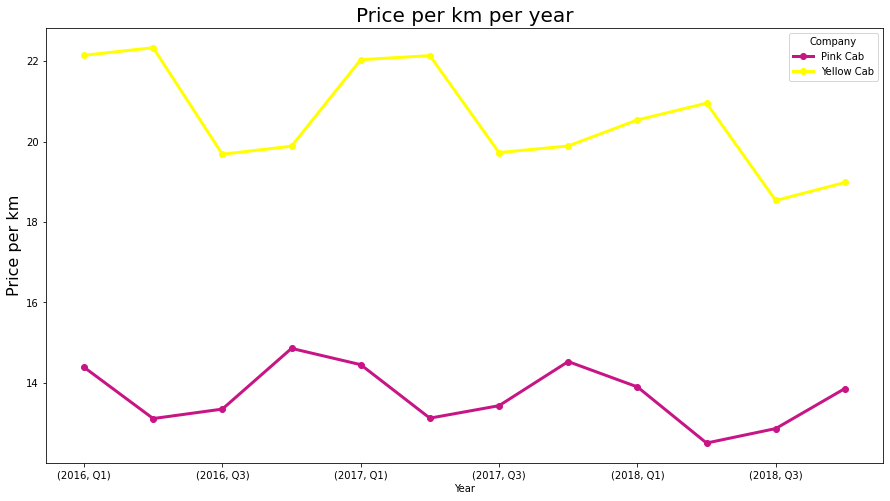

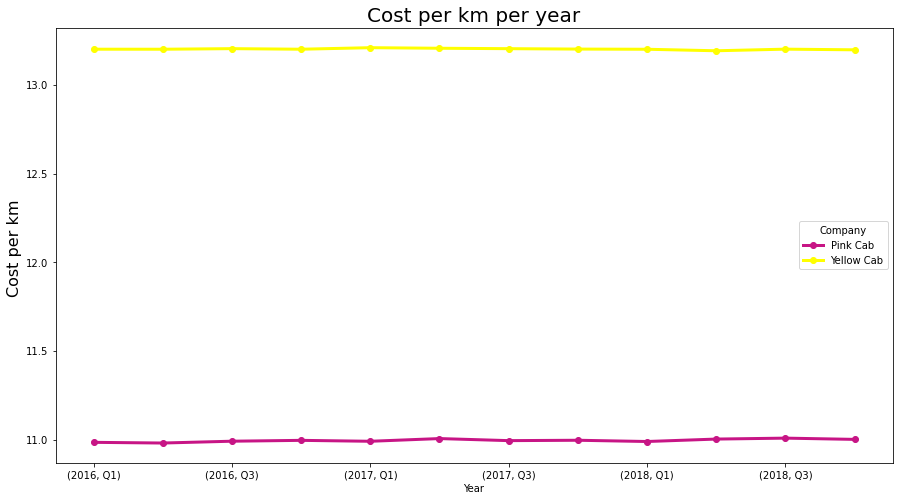

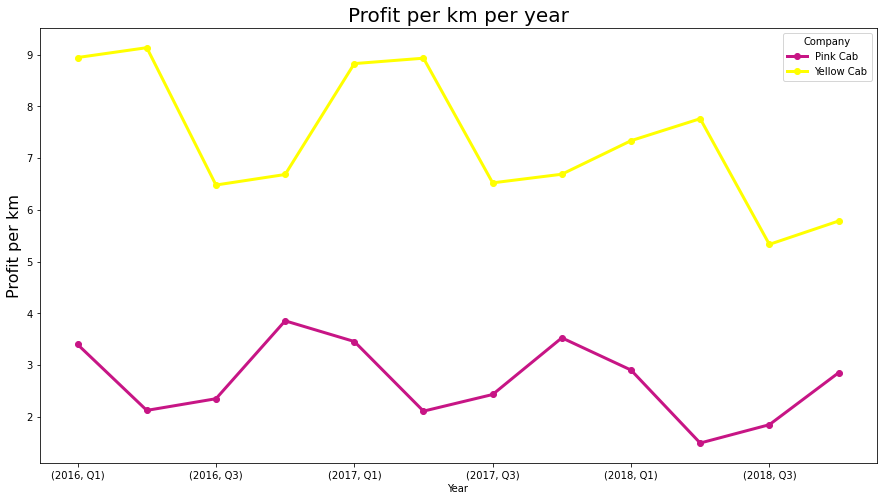

In [176]:
#Cost, price and profit per km by quarter

price_comp_q_km.plot.line(color = ('mediumvioletred',"yellow"),label='Price per km per year',linewidth=3, marker='o')
plt.ylabel('Price per km', fontsize=16)
plt.title('Price per km per year',fontsize=20)
plt.xlabel('Year')
plt.show()

cost_comp_q_km.plot.line(color = ('mediumvioletred',"yellow"),label='Cost per km per year',linewidth=3, marker='o')
plt.ylabel('Cost per km ', fontsize=16)
plt.title('Cost per km per year',fontsize=20)
plt.xlabel('Year')
plt.show()

profit_comp_q_km.plot.line(color = ('mediumvioletred',"yellow"),label='Profit per km per year',linewidth=3, marker='o')
plt.ylabel('Profit per km', fontsize=16)
plt.title('Profit per km per year',fontsize=20)
plt.xlabel('Year')
plt.show()

In important insight is the lack of flucuation among quarters in Cost. For both companies, it is almosth the same along the 3 years period

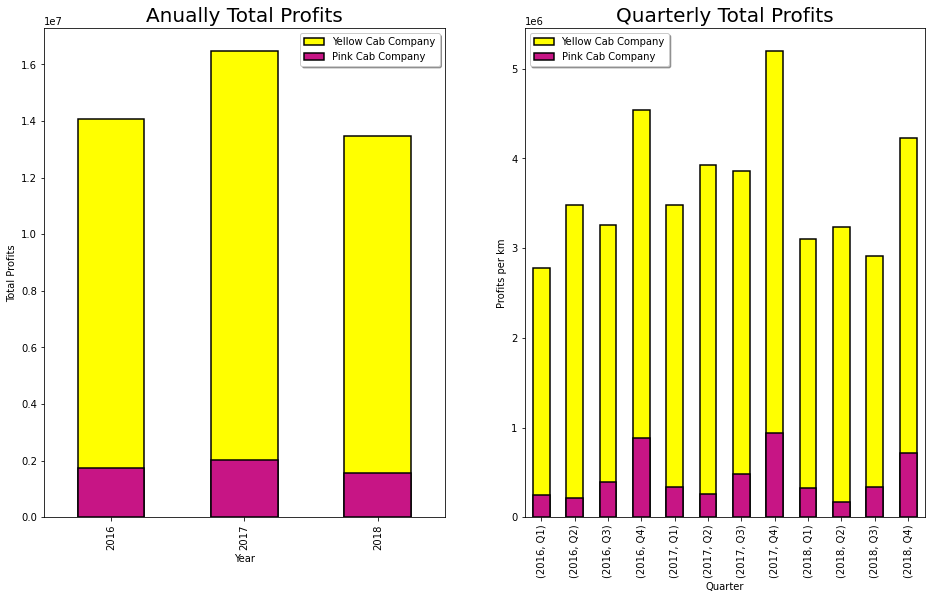

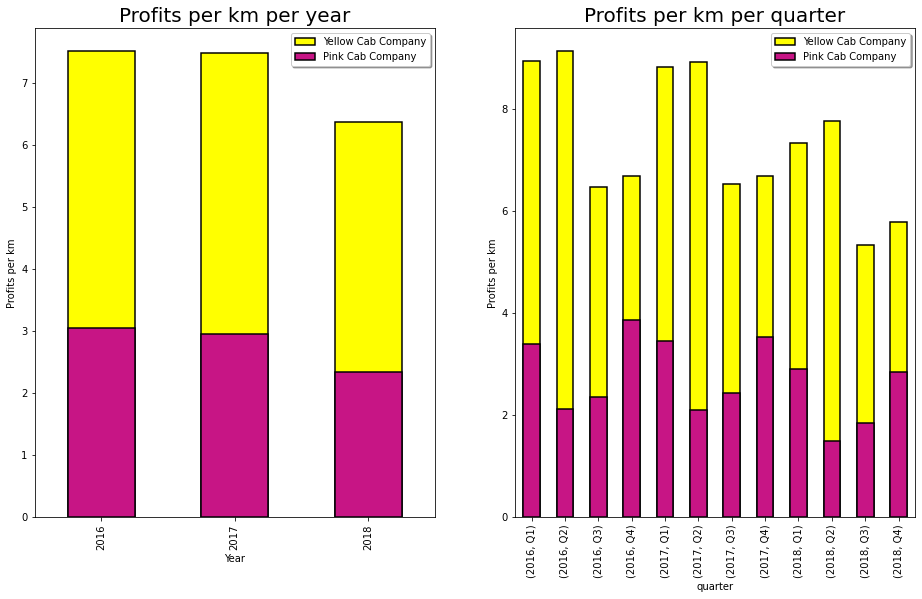

In [212]:
#To see the quarterly profit distribution between both companies:
#First, total profits
#Second, profits per km:


x1=profit_comp_y["Yellow Cab"]
x2=profit_comp_y["Pink Cab"]
x3=profit_comp_q["Yellow Cab"]
x4=profit_comp_q["Pink Cab"]
x5= profit_comp_y_km["Yellow Cab"]
x6= profit_comp_y_km["Pink Cab"]
x7= profit_comp_q_km["Yellow Cab"]
x8= profit_comp_q_km["Pink Cab"]

plt.figure(figsize=(33,9))

plt.subplot(1,4,1)
fig= x1.plot.bar(color = 'yellow',label='Yellow Cab Company',edgecolor='black',linewidth=1.5)
fig=x2.plot.bar(color = 'mediumvioletred',label='Pink Cab Company',edgecolor='black',linewidth=1.5)
plt.ylabel("Total Profits")
plt.title('Anually Total Profits',fontsize=20)
plt.xlabel('Year')
plt.legend(loc='best', shadow=True)

plt.subplot(1,4,2)
fig= x3.plot.bar(color = 'yellow',label='Yellow Cab Company',edgecolor='black',linewidth=1.5)
fig=x4.plot.bar(color = 'mediumvioletred',label='Pink Cab Company',edgecolor='black',linewidth=1.5)
plt.ylabel('Profits per km')
plt.title('Quarterly Total Profits',fontsize=20)
plt.xlabel('Quarter')
plt.legend(loc='best', shadow=True)

plt.figure(figsize=(33,9))

plt.subplot(1,4,3)
fig= x5.plot.bar(color = 'yellow',label='Yellow Cab Company',edgecolor='black',linewidth=1.5)
fig=x6.plot.bar(color = 'mediumvioletred',label='Pink Cab Company',edgecolor='black',linewidth=1.5)
plt.ylabel('Profits per km')
plt.title('Profits per km per year',fontsize=20)
plt.xlabel('Year')
plt.legend(loc='best', shadow=True)

plt.subplot(1,4,4)
fig= x7.plot.bar(color = 'yellow',label='Yellow Cab Company',edgecolor='black',linewidth=1.5)
fig=x8.plot.bar(color = 'mediumvioletred',label='Pink Cab Company',edgecolor='black',linewidth=1.5)
plt.ylabel('Profits per km')
plt.title('Profits per km per quarter',fontsize=20)
plt.xlabel('quarter')
plt.legend(loc='best', shadow=True)


### Profit by city for both companies

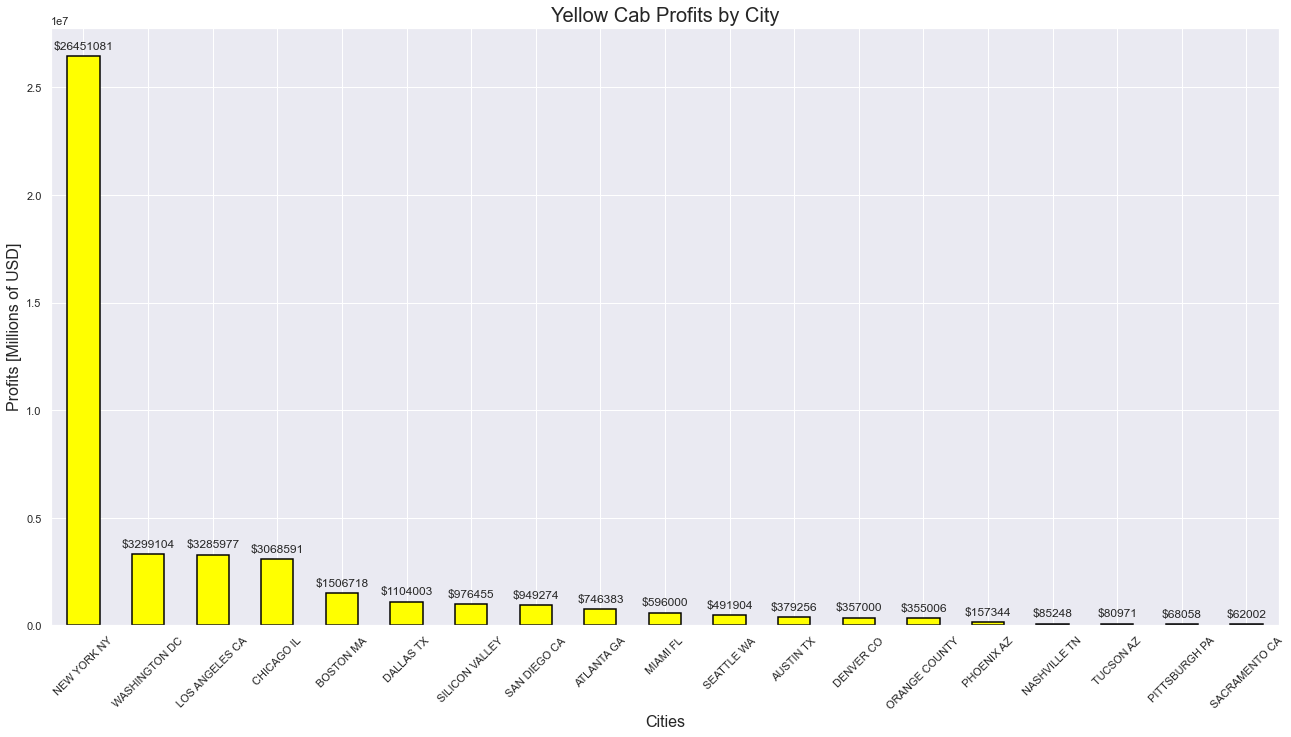

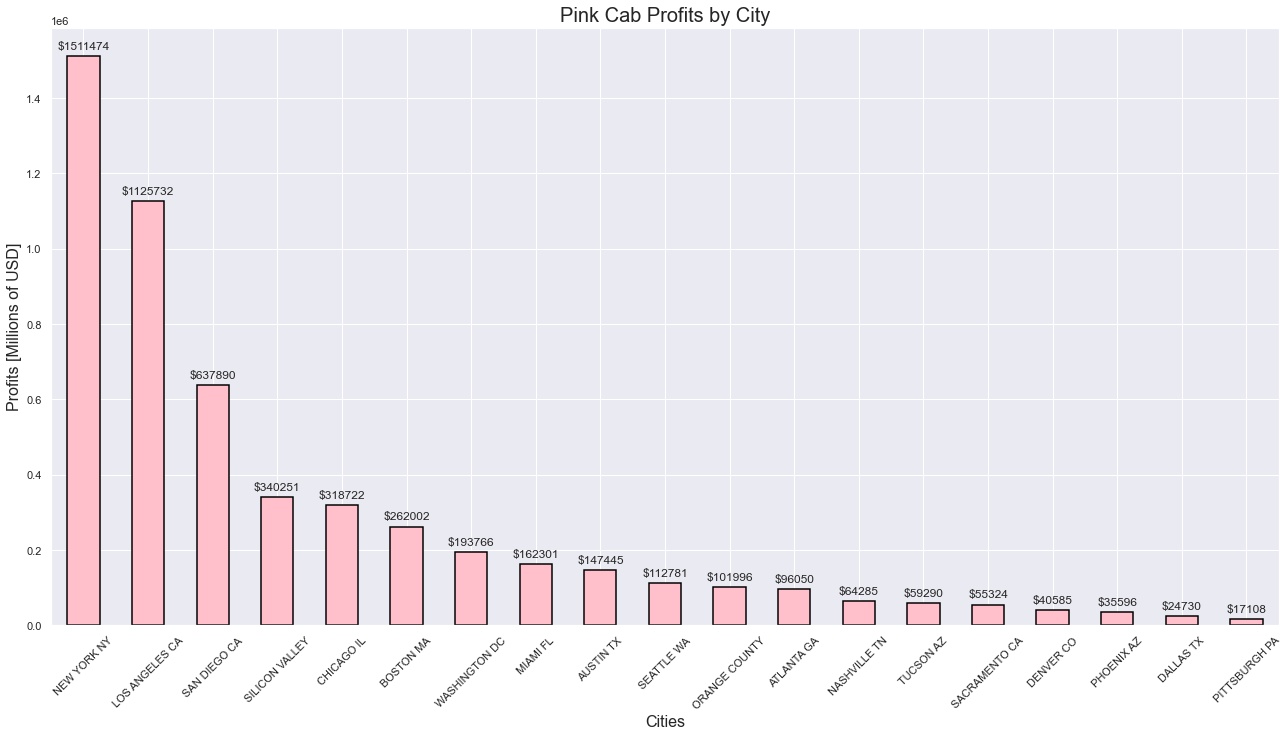

In [99]:
# By city

#Total profits by city


#plt.subplot(1,2,1)
ppc= df_yellow.groupby('City').profit_per_travel.sum()
ppc= pd.DataFrame(ppc)
ppc = ppc.sort_values(by='profit_per_travel', ascending= False )

plt.figure(figsize=(22,11))
fig= ppc.profit_per_travel.plot.bar(color = 'yellow',edgecolor='black',linewidth=1.5)
plt.xticks(rotation=45)

plt.ylabel('Profits [Millions of USD]', fontsize=16)
plt.xlabel('Cities', fontsize=16)
plt.title('Yellow Cab Profits by City',fontsize=20)
add_value_labels(fig)


#plt.subplot(1,2,2)
ppc= df_pink.groupby('City').profit_per_travel.sum()
ppc= pd.DataFrame(ppc)
ppc = ppc.sort_values(by='profit_per_travel', ascending= False )
ppc.head()

plt.figure(figsize=(22,11))
fig= ppc.profit_per_travel.plot.bar(color = 'pink',edgecolor='black',linewidth=1.5)
plt.xticks(rotation=45)

plt.ylabel('Profits [Millions of USD]', fontsize=16)
plt.xlabel('Cities', fontsize=16)
plt.title('Pink Cab Profits by City',fontsize=20)
add_value_labels(fig)



#Profits per km per city



In [101]:


df_main.groupby('City').Population.sum().sort_values(ascending=False)

City
NEW YORK NY       839617028745
CHICAGO IL        110709236250
LOS ANGELES CA     76614412221
SAN DIEGO CA       19654281816
WASHINGTON DC      18319636083
SILICON VALLEY     10032051071
MIAMI FL            8642906370
BOSTON MA           7392357856
DALLAS TX           6616385436
ATLANTA GA          6158085945
SEATTLE WA          5367890286
ORANGE COUNTY       4102196670
AUSTIN TX           3419224416
DENVER CO           2884941225
PHOENIX AZ          1948413936
SACRAMENTO CA       1291851792
TUCSON AZ           1219314502
NASHVILLE TN         984947250
PITTSBURGH PA        711757605
Name: Population, dtype: int64

More profitable city for both companies, are as expected, the cities with the most population.

### Profit by gender for both companies

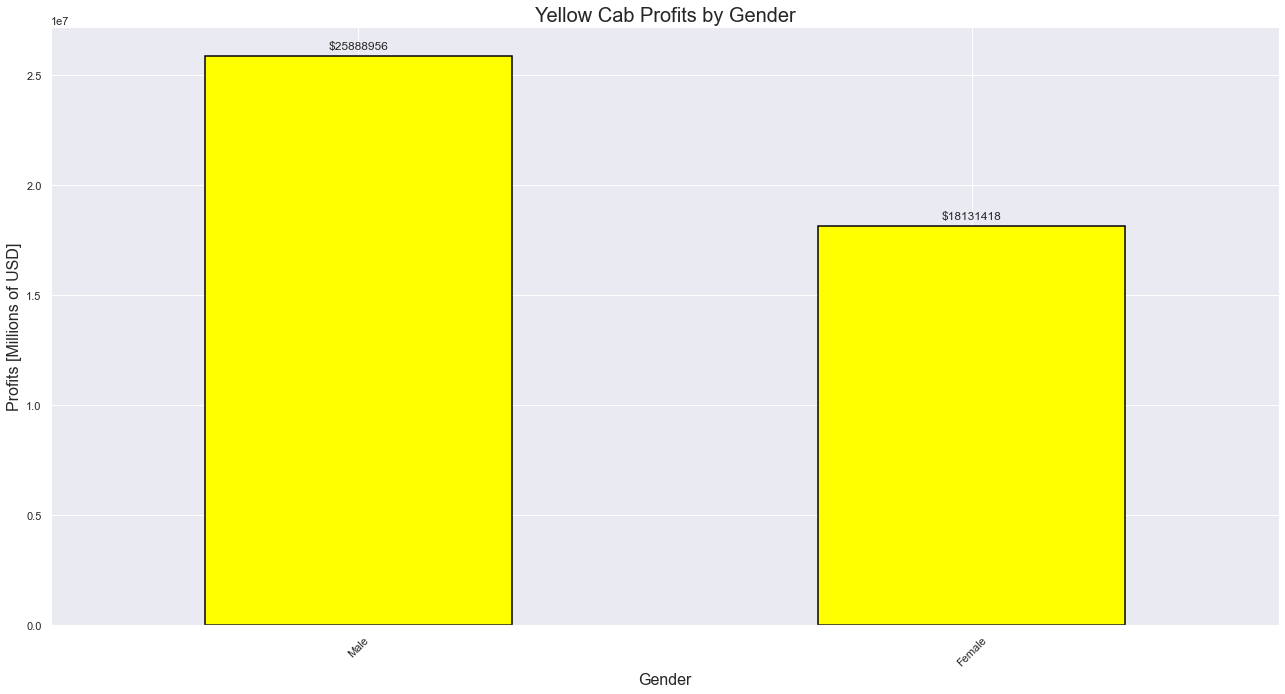

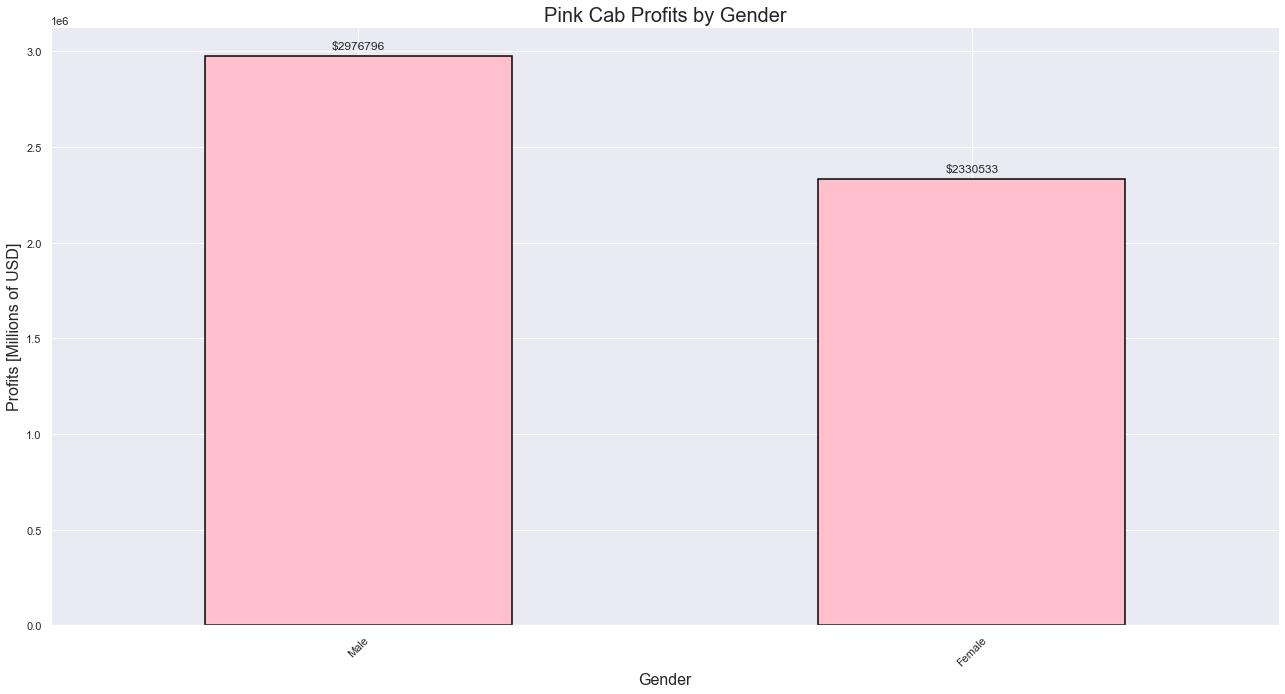

In [103]:
# By gender

#Total profit by city


#plt.subplot(1,2,1)
ppc= df_yellow.groupby('Gender').profit_per_travel.sum()
ppc= pd.DataFrame(ppc)
ppc = ppc.sort_values(by='profit_per_travel', ascending= False )

plt.figure(figsize=(22,11))
fig= ppc.profit_per_travel.plot.bar(color = 'yellow',edgecolor='black',linewidth=1.5)
plt.xticks(rotation=45)

plt.ylabel('Profits [Millions of USD]', fontsize=16)
plt.xlabel('Gender', fontsize=16)
plt.title('Yellow Cab Profits by Gender',fontsize=20)
add_value_labels(fig)


#plt.subplot(1,2,2)
ppc= df_pink.groupby('Gender').profit_per_travel.sum()
ppc= pd.DataFrame(ppc)
ppc = ppc.sort_values(by='profit_per_travel', ascending= False )
ppc.head()

plt.figure(figsize=(22,11))
fig= ppc.profit_per_travel.plot.bar(color = 'pink',edgecolor='black',linewidth=1.5)
plt.xticks(rotation=45)

plt.ylabel('Profits [Millions of USD]', fontsize=16)
plt.xlabel('Gender', fontsize=16)
plt.title('Pink Cab Profits by Gender',fontsize=20)
add_value_labels(fig)




In [48]:
#the insights from last graphs about profits from males vs females are exepcted, because it follows the 
#the distribution of male-female of the sample.

gender_prof=df_main.groupby('Gender')["Transaction ID"].count()
gender_prof=pd.DataFrame(gender_prof)
gender_prof_perc=gender_prof/gender_prof["Transaction ID"].sum()

gender_prof_perc


,Transaction ID
Gender,
Female,0.43
Male,0.57


Nothing new, it follows the the distribution of travels of male-female of the sample.

### Profit by Payment_Mode for both companies

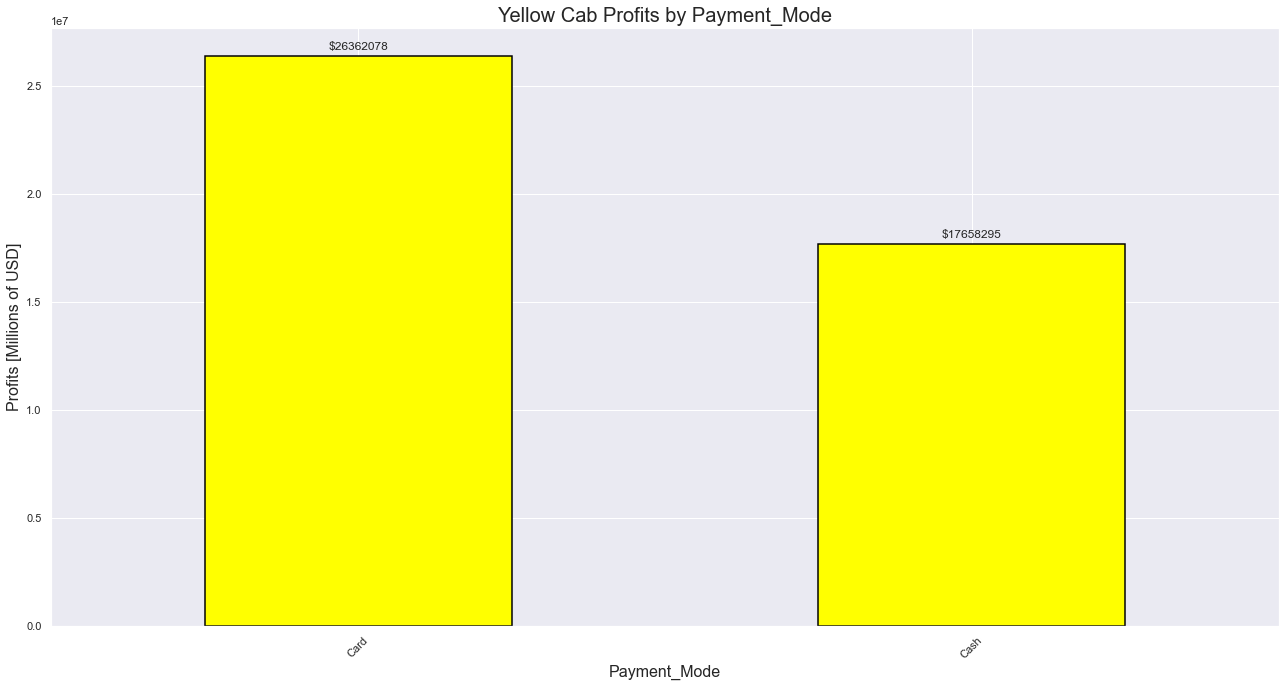

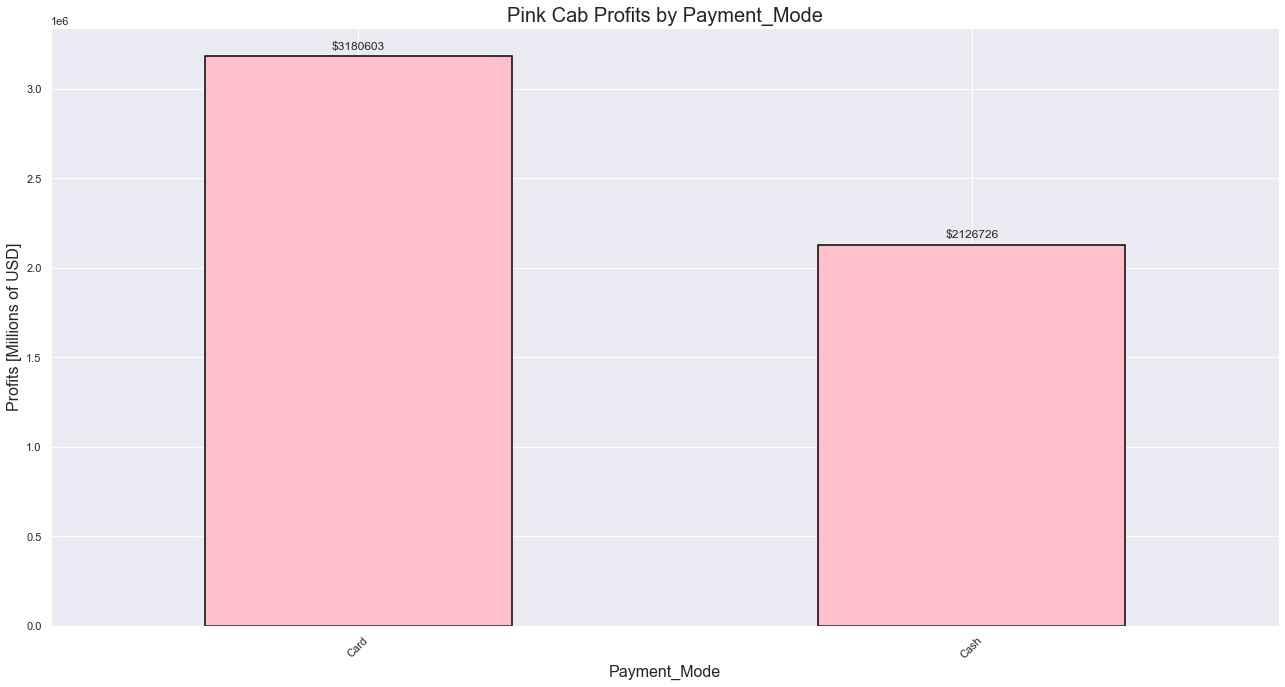

In [134]:
# By Payment_Mode

#Total profit by Payment_Mode


#plt.subplot(1,2,1)
ppc= df_yellow.groupby('Payment_Mode').profit_per_travel.sum()
ppc= pd.DataFrame(ppc)
ppc = ppc.sort_values(by='profit_per_travel', ascending= False )

plt.figure(figsize=(22,11))
fig= ppc.profit_per_travel.plot.bar(color = 'yellow',edgecolor='black',linewidth=1.5)
plt.xticks(rotation=45)

plt.ylabel('Profits [Millions of USD]', fontsize=16)
plt.xlabel('Payment_Mode', fontsize=16)
plt.title('Yellow Cab Profits by Payment_Mode',fontsize=20)
add_value_labels(fig)


#plt.subplot(1,2,2)
ppc= df_pink.groupby('Payment_Mode').profit_per_travel.sum()
ppc= pd.DataFrame(ppc)
ppc = ppc.sort_values(by='profit_per_travel', ascending= False )
ppc.head()

plt.figure(figsize=(22,11))
fig= ppc.profit_per_travel.plot.bar(color = 'pink',edgecolor='black',linewidth=1.5)
plt.xticks(rotation=45)

plt.ylabel('Profits [Millions of USD]', fontsize=16)
plt.xlabel('Payment_Mode', fontsize=16)
plt.title('Pink Cab Profits by Payment_Mode',fontsize=20)
add_value_labels(fig)





In [359]:
Payment_Mode_prof=df_main.groupby('Payment_Mode')["Transaction ID"].count()
Payment_Mode_prof=pd.DataFrame(Payment_Mode_prof)
Payment_Mode_prof_per=Payment_Mode_prof/Payment_Mode_prof["Transaction ID"].sum()

Payment_Mode_prof_per

,Transaction ID
Payment_Mode,
Card,0.60
Cash,0.40


Similar situation than profits analised by gender. It just follows the distribution of Payment_Mode of the 
total sample, nothing surprising

## Demand Analysis - Travels

### Demand by year and quarter

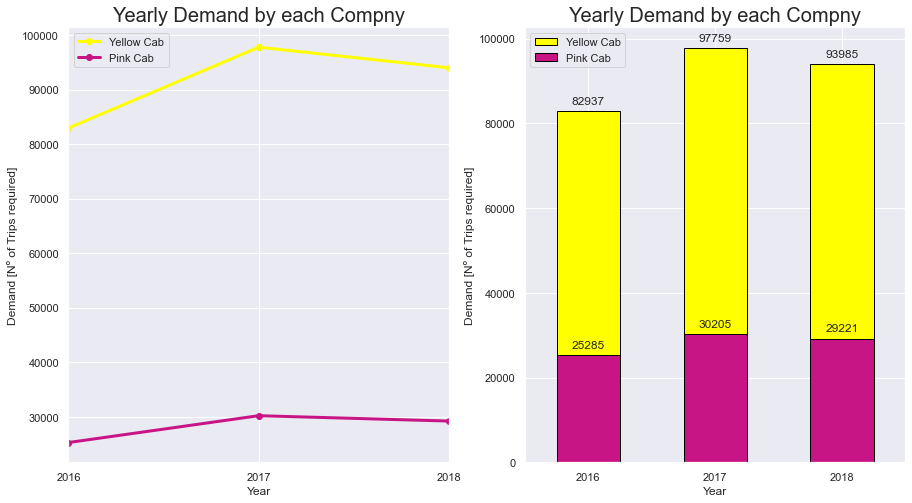

In [64]:
#Demand per year

plt.subplot(1,2,1)
df_yellow['Date of Travel'].value_counts().resample('Y').sum().plot.line(color = 'yellow',linewidth =3,marker='o')
df_pink['Date of Travel'].value_counts().resample('Y').sum().plot.line(color = 'mediumvioletred',linewidth =3,marker='o')
plt.legend(['Yellow Cab', 'Pink Cab'])
plt.title('Yearly Demand by each Compny',fontsize=20)
plt.ylabel('Demand [Nº of Trips required]')
plt.xlabel('Year')

plt.subplot(1,2,2)
m=df_yellow['Date of Travel'].value_counts().resample('Y').sum().plot.bar(color = 'yellow', edgecolor ='black')
m=df_pink['Date of Travel'].value_counts().resample('Y').sum().plot.bar(color = 'mediumvioletred', edgecolor ='black')
plt.legend(['Yellow Cab', 'Pink Cab'])
plt.title('Yearly Demand by each Compny',fontsize=20)
plt.ylabel('Demand [Nº of Trips required]')
plt.xlabel('Year')
años = ['2016','2017','2018']
mapeado = range(len(años))
plt.xticks(mapeado, años, rotation =0)
plt.xticks(rotation=0)
add_value_labels1(m)


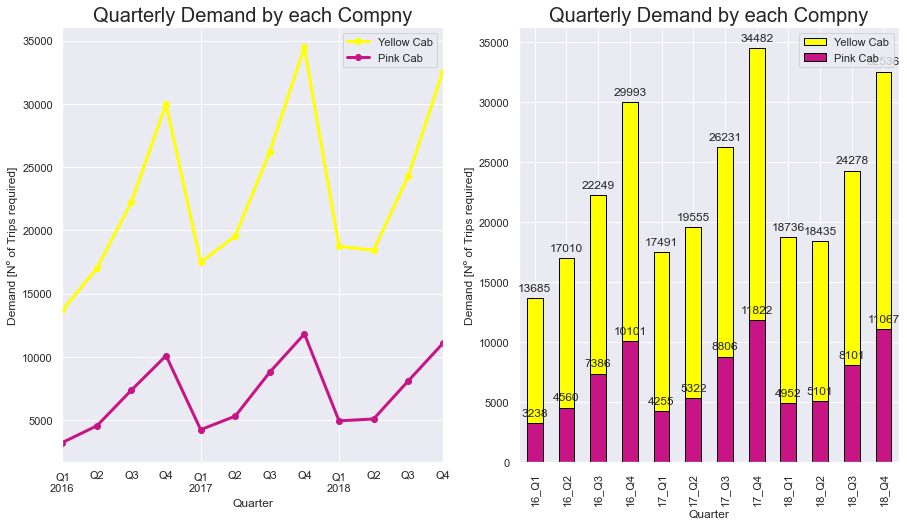

In [86]:
#Demand per quarter

plt.subplot(1,2,1)
df_yellow['Date of Travel'].value_counts().resample('Q').sum().plot.line(color = 'yellow',linewidth =3,marker='o')
df_pink['Date of Travel'].value_counts().resample('Q').sum().plot.line(color = 'mediumvioletred',linewidth =3,marker='o')
plt.legend(['Yellow Cab', 'Pink Cab'])
plt.title('Quarterly Demand by each Compny',fontsize=20)
plt.ylabel('Demand [Nº of Trips required]')
plt.xlabel('Quarter')

plt.subplot(1,2,2)
m=df_yellow['Date of Travel'].value_counts().resample('Q').sum().plot.bar(color = 'yellow', edgecolor ='black')
m=df_pink['Date of Travel'].value_counts().resample('Q').sum().plot.bar(color = 'mediumvioletred', edgecolor ='black')
plt.legend(['Yellow Cab', 'Pink Cab'])
plt.title('Quarterly Demand by each Compny',fontsize=20)
plt.ylabel('Demand [Nº of Trips required]')
plt.xlabel('Quarter')
quarter = ['16_Q1','16_Q2','16_Q3','16_Q4','17_Q1','17_Q2','17_Q3','17_Q4','18_Q1','18_Q2','18_Q3','18_Q4']
mapeado = range(len(quarter))
plt.xticks(mapeado, quarter, rotation =0)
plt.xticks(rotation=90)
add_value_labels1(m)

### Demand by city

Text(0.5, 1.0, 'Pink Cab demand (travels) by City')

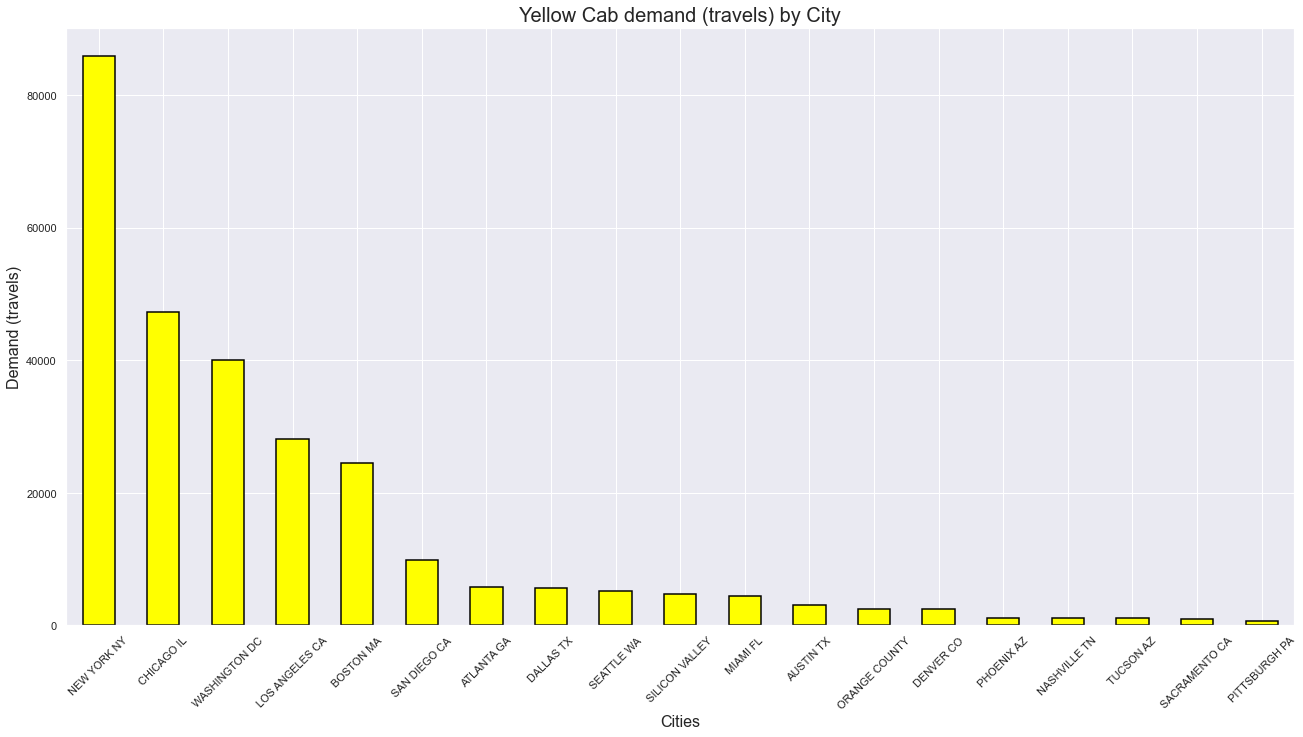

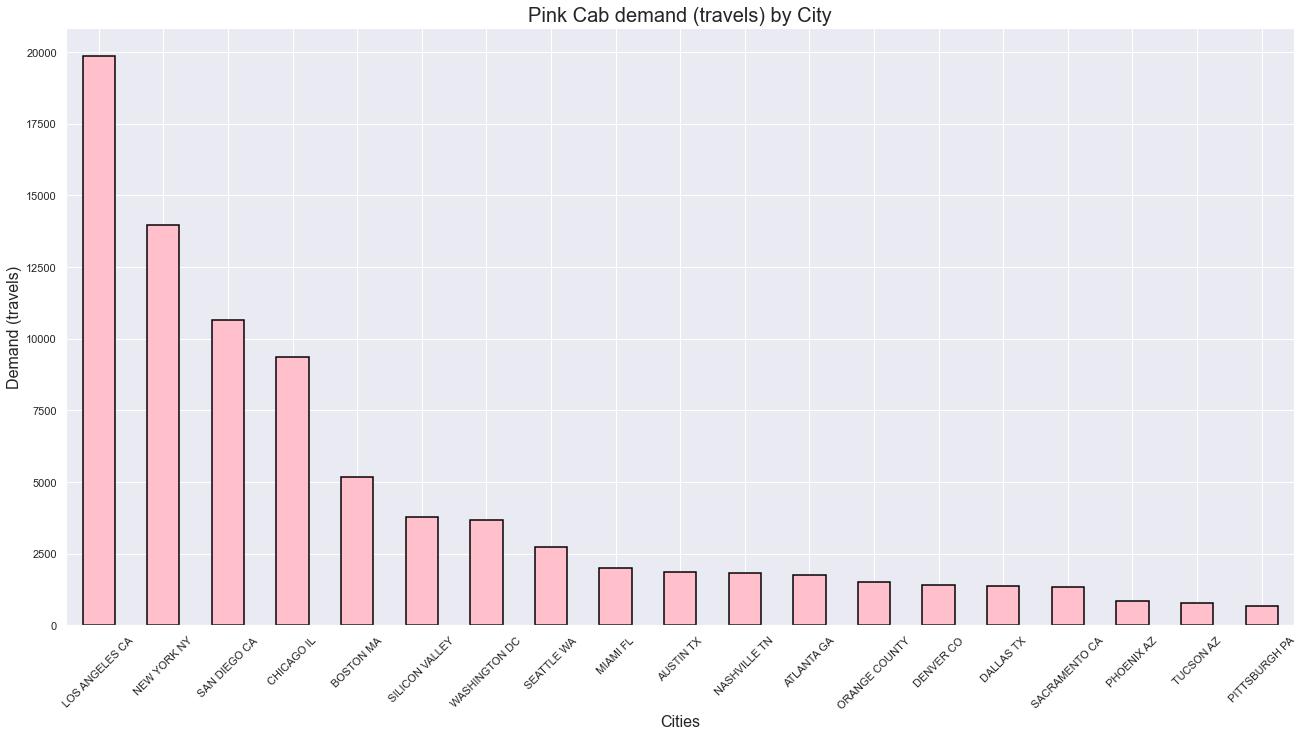

In [194]:
#plt.subplot(1,2,1)
ppc= df_yellow.City.value_counts()
ppc= pd.DataFrame(ppc)
ppc = ppc.sort_values(by="City", ascending= False )

plt.figure(figsize=(22,11))
fig= ppc.City.plot.bar(color = 'yellow',edgecolor='black',linewidth=1.5)
plt.xticks(rotation=45)

plt.ylabel('Demand (travels)', fontsize=16)
plt.xlabel('Cities', fontsize=16)
plt.title('Yellow Cab demand (travels) by City',fontsize=20)
#add_value_labels(fig)


#plt.subplot(1,2,2)
ppc= df_pink.City.value_counts()
ppc= pd.DataFrame(ppc)
ppc = ppc.sort_values(by='City', ascending= False )
ppc.head()

plt.figure(figsize=(22,11))
fig= ppc.City.plot.bar(color = 'pink',edgecolor='black',linewidth=1.5)
plt.xticks(rotation=45)

plt.ylabel("Demand (travels)", fontsize=16)
plt.xlabel('Cities', fontsize=16)
plt.title('Pink Cab demand (travels) by City',fontsize=20)
#add_value_labels(fig)




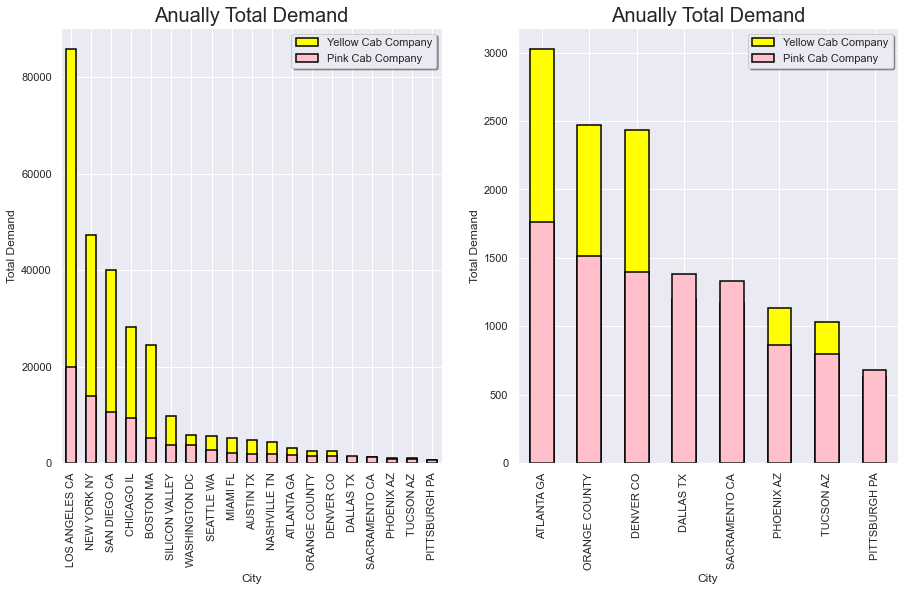

In [195]:
x1=df_yellow.City.value_counts()
x2=df_pink.City.value_counts()
x3=x1.tail(8)
x4=x2.tail(8)

plt.subplot(1,2,1)

fig= x1.plot.bar(color = 'yellow',label='Yellow Cab Company',edgecolor='black',linewidth=1.5)
fig=x2.plot.bar(color = 'pink',label='Pink Cab Company',edgecolor='black',linewidth=1.5)
plt.ylabel("Total Demand")
plt.title('Anually Total Demand',fontsize=20)
plt.xlabel('City')
plt.legend(loc='best', shadow=True)

plt.subplot(1,2,2)


fig= x3.plot.bar(color = 'yellow',label='Yellow Cab Company',edgecolor='black',linewidth=1.5)
fig=x4.plot.bar(color = 'pink',label='Pink Cab Company',edgecolor='black',linewidth=1.5)
plt.ylabel("Total Demand")
plt.title('Anually Total Demand',fontsize=20)
plt.xlabel('City')
plt.legend(loc='best', shadow=True)

In [225]:
df_main.groupby("City")["Users"].sum().sort_values(ascending=False)



#df_main.pivot_table('Population', index='Company', columns='City', margins=True, margins_name= "totales",aggfunc=sum)
#df_main.pivot_table()

City
NEW YORK NY       30180152865
CHICAGO IL         9313000500
LOS ANGELES CA     6923092356
WASHINGTON DC      5554642737
BOSTON MA          2375983532
SAN DIEGO CA       1434057560
SILICON VALLEY      232117193
SEATTLE WA          200428811
ATLANTA GA          186665457
DALLAS TX           155475669
MIAMI FL            114074450
AUSTIN TX            73332288
ORANGE COUNTY        51742108
DENVER CO            47510325
NASHVILLE TN         27902700
SACRAMENTO CA        16673148
PHOENIX AZ           12658512
TUCSON AZ            11029872
PITTSBURGH PA         4783259
Name: Users, dtype: int64

There are some cities that Pink Cab has a bigger market share than Yellow Cab. We will take this point to check if there is a reason because Yellow Cab is even not present in some of that cities

### Demand by gender



Text(0.5, 1.0, 'Pink Cab demand (travels) by Gender')

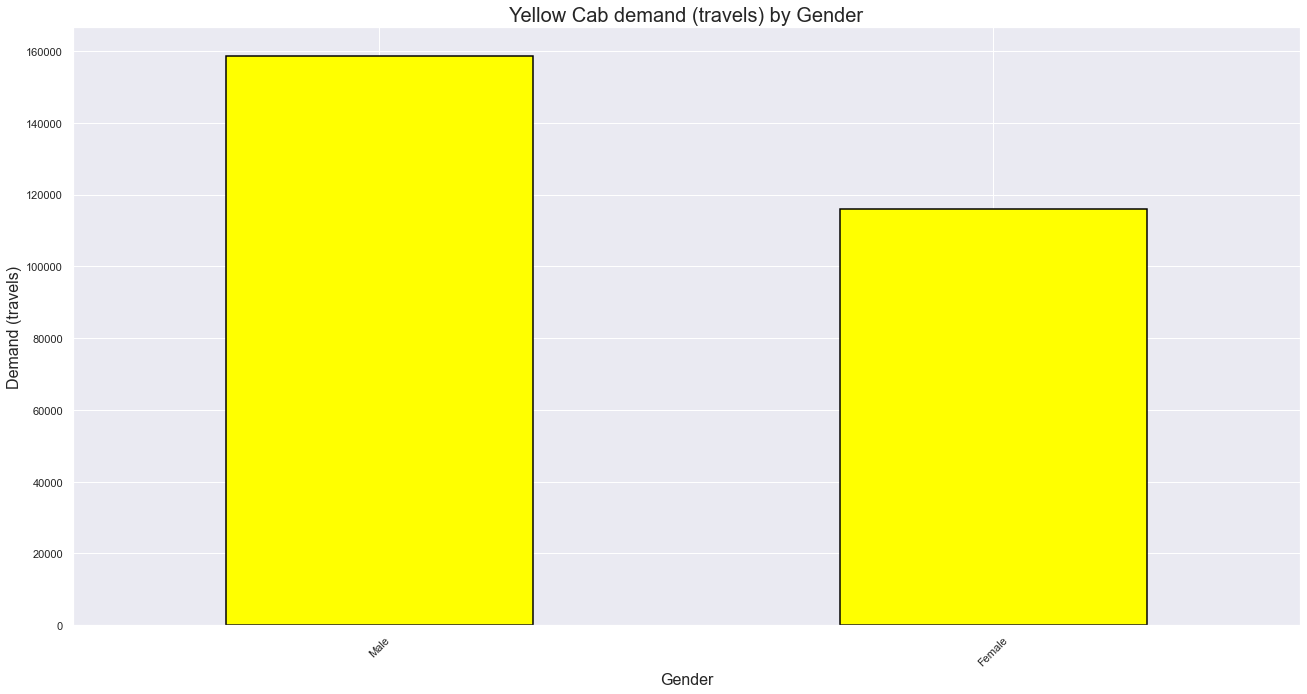

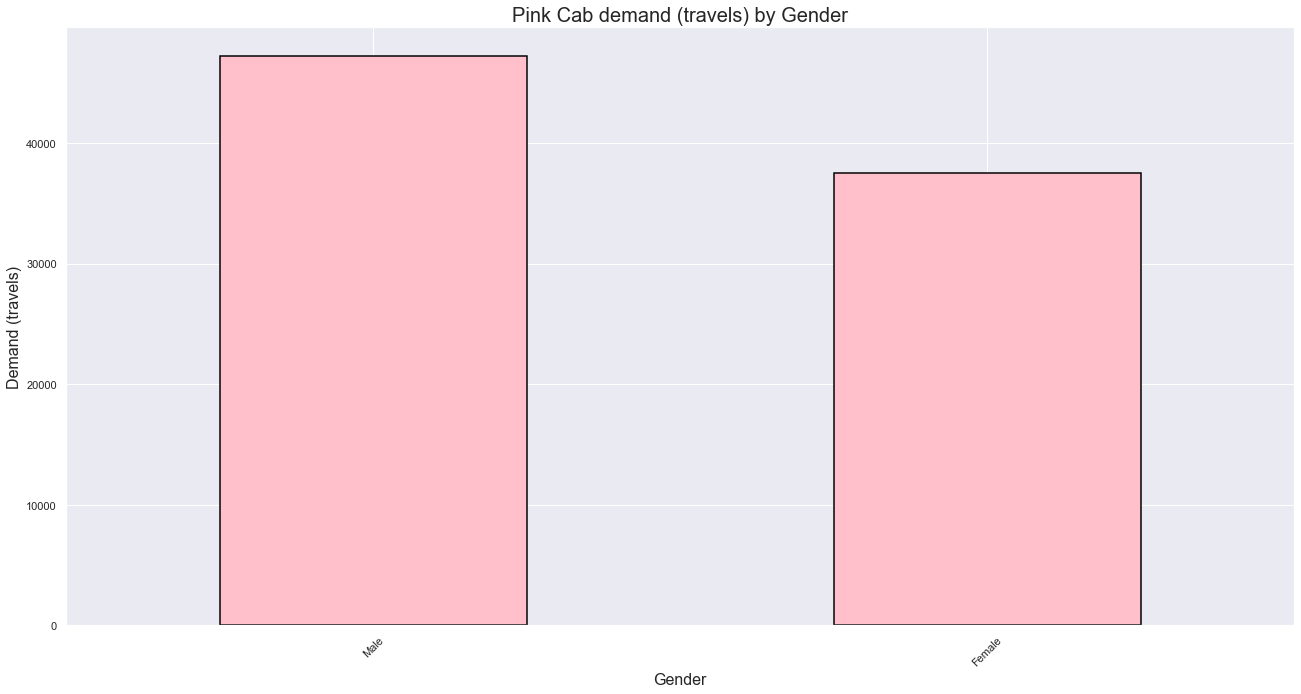

In [181]:
#plt.subplot(1,2,1)
ppc= df_yellow['Gender'].value_counts()
ppc= pd.DataFrame(ppc)
ppc = ppc.sort_values(by='Gender', ascending= False )

plt.figure(figsize=(22,11))
fig= ppc.Gender.plot.bar(color = 'yellow',edgecolor='black',linewidth=1.5)
plt.xticks(rotation=45)

plt.ylabel('Demand (travels)', fontsize=16)
plt.xlabel('Gender', fontsize=16)
plt.title('Yellow Cab demand (travels) by Gender',fontsize=20)
#add_value_labels(fig)


#plt.subplot(1,2,2)
ppc= df_pink['Gender'].value_counts()
ppc= pd.DataFrame(ppc)
ppc = ppc.sort_values(by='Gender', ascending= False )
ppc.head()

plt.figure(figsize=(22,11))
fig= ppc.Gender.plot.bar(color = 'pink',edgecolor='black',linewidth=1.5)
plt.xticks(rotation=45)

plt.ylabel("Demand (travels)", fontsize=16)
plt.xlabel('Gender', fontsize=16)
plt.title('Pink Cab demand (travels) by Gender',fontsize=20)
#add_value_labels(fig)


### Demand by Payment_Mode

Text(0.5, 1.0, 'Pink Cab demand (travels) by Payment_Mode')

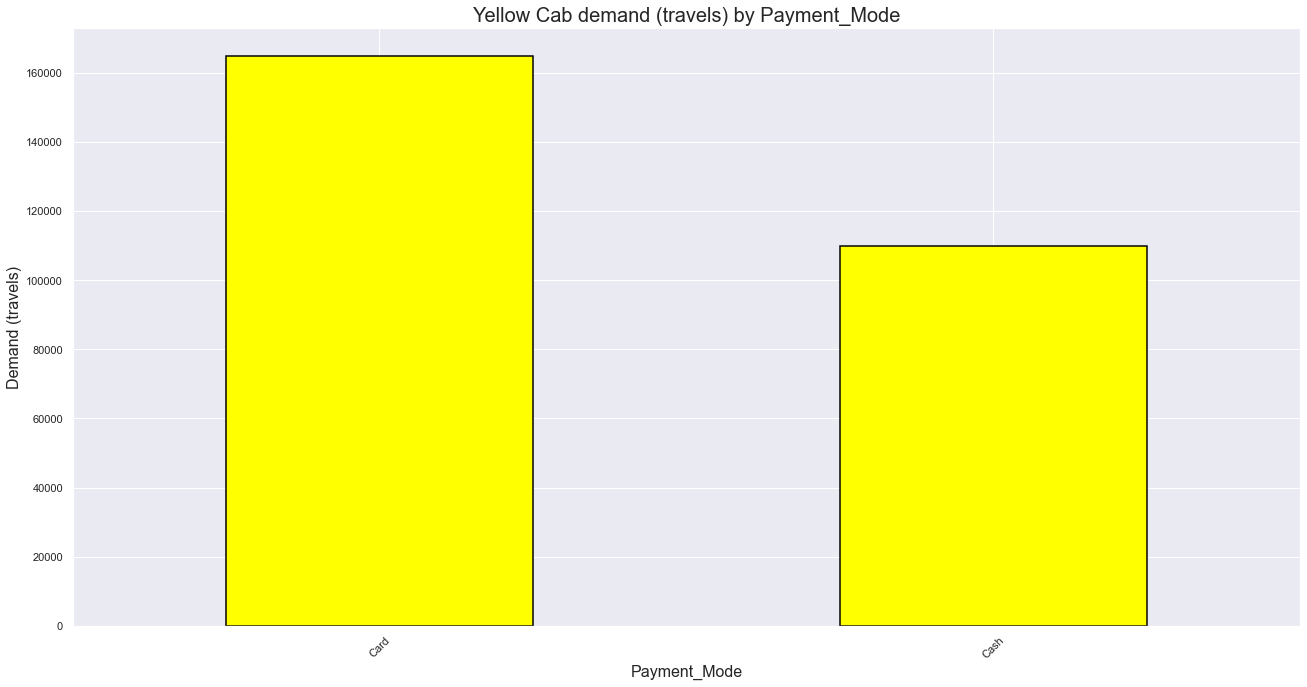

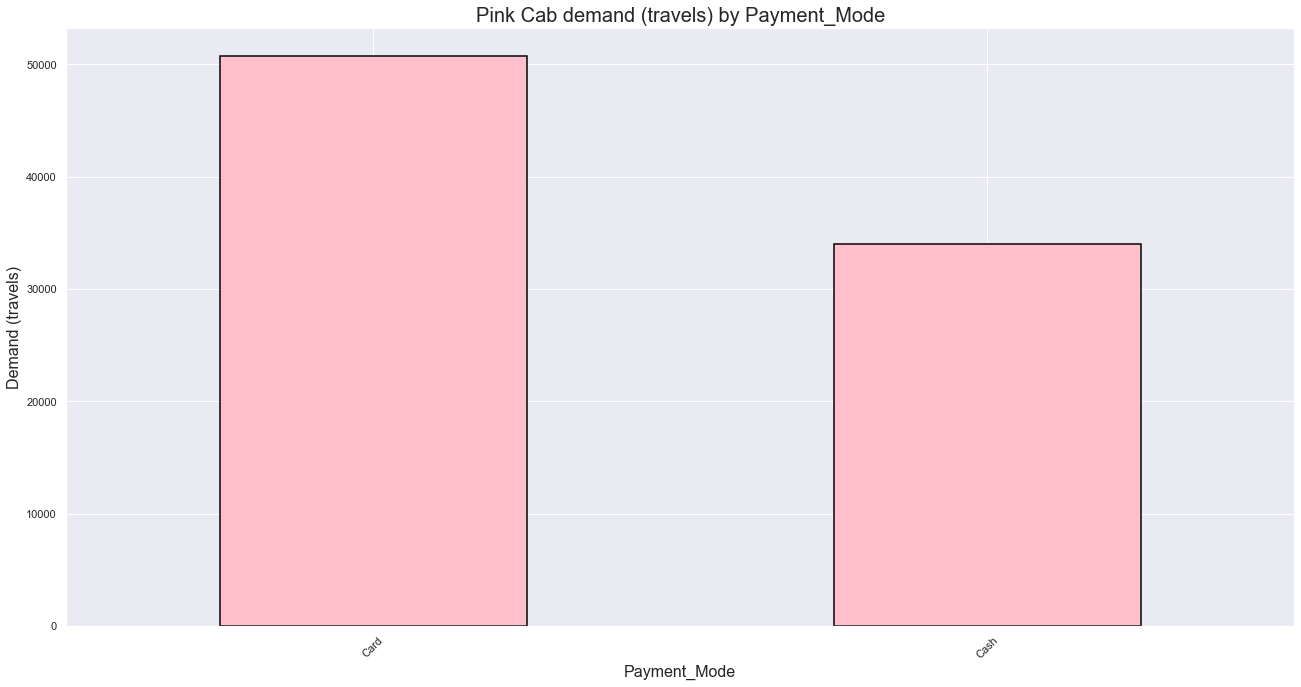

In [182]:


#plt.subplot(1,2,1)
ppc= df_yellow['Payment_Mode'].value_counts()
ppc= pd.DataFrame(ppc)
ppc = ppc.sort_values(by='Payment_Mode', ascending= False )

plt.figure(figsize=(22,11))
fig= ppc.Payment_Mode.plot.bar(color = 'yellow',edgecolor='black',linewidth=1.5)
plt.xticks(rotation=45)

plt.ylabel('Demand (travels)', fontsize=16)
plt.xlabel('Payment_Mode', fontsize=16)
plt.title('Yellow Cab demand (travels) by Payment_Mode',fontsize=20)
#add_value_labels(fig)


#plt.subplot(1,2,2)
ppc= df_pink['Payment_Mode'].value_counts()
ppc= pd.DataFrame(ppc)
ppc = ppc.sort_values(by='Payment_Mode', ascending= False )
ppc.head()

plt.figure(figsize=(22,11))
fig= ppc.Payment_Mode.plot.bar(color = 'pink',edgecolor='black',linewidth=1.5)
plt.xticks(rotation=45)

plt.ylabel("Demand (travels)", fontsize=16)
plt.xlabel('Payment_Mode', fontsize=16)
plt.title('Pink Cab demand (travels) by Payment_Mode',fontsize=20)
#add_value_labels(fig)

### Demand by age range

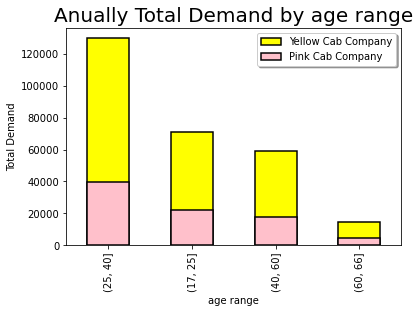

In [267]:
x1=df_yellow.age_range.value_counts()
x2=df_pink.age_range.value_counts()


fig= x1.plot.bar(color = 'yellow',label='Yellow Cab Company',edgecolor='black',linewidth=1.5)
fig=x2.plot.bar(color = 'pink',label='Pink Cab Company',edgecolor='black',linewidth=1.5)
plt.ylabel("Total Demand")
plt.title('Anually Total Demand by age range',fontsize=20)
plt.xlabel('age range')
plt.legend(loc='best', shadow=True)

As we saw before, the biggest piece of market if in the age range 25-40.The big drop is in 41 years old.

In [363]:
list(yel_mktshare_8["index"])

['AUSTIN TX',
 'ORANGE COUNTY',
 'DENVER CO',
 'PHOENIX AZ',
 'NASHVILLE TN',
 'TUCSON AZ',
 'SACRAMENTO CA',
 'PITTSBURGH PA']

### New feature - Non profitable travel rate - by city

Analyse non profitable travels along cities to check if there is any reason because Yellow Cab has no - low presence in cities we mentioned before (Austin, Orange County, Denver, Phoenix, Nashville, Tucson, Sacramento and Pittsburgh).

In [284]:
non_prof_travels=df_main.loc[df_main.Profit_per_travel<0]
total_travels=df_main.City.value_counts()
non_prof_cities=non_prof_travels.pivot_table("Transaction ID",index="City",aggfunc="count").sort_values(by="Transaction ID",ascending=False)

non_prof_cities["total_travels"]=total_travels
non_prof_cities["perc_non_prof"]=non_prof_cities["Transaction ID"]/total_travels
    
non_prof_cities=non_prof_cities.sort_values(by="perc_non_prof",ascending=False)

non_prof_city_perc=non_prof_cities.perc_non_prof

non_prof_city_perc_8=non_prof_city_perc.head(8)
print("The 8 cities with the highest non-profitable travel rates :")

print(non_prof_city_perc_8)

yel_mktshare=df_main.loc[df_main.Company=="Yellow Cab"].City.value_counts()
pink_mktshare=df_main.loc[df_main.Company=="Pink Cab"].City.value_counts()

yel_mktshare_8=yel_mktshare.tail(8)
print("The 8 cities with the lowest Yellow Cab market share :")

print(yel_mktshare_8)

non_prof_city_perc_8=pd.DataFrame(non_prof_city_perc_8)
yel_mktshare_8=pd.DataFrame(yel_mktshare_8)

non_prof_city_perc_8=non_prof_city_perc_8.reset_index()
yel_mktshare_8=yel_mktshare_8.reset_index()

non_prof_city_list_8=non_prof_city_perc_8.City
yel_mkt_list_8=yel_mktshare_8["index"]

yel_mkt_list_8=list(yel_mkt_list_8)
non_prof_city_list_8=list(non_prof_city_list_8)

list_city=[]


for i in yel_mkt_list_8:
    for j in non_prof_city_list_8:
        if(i==j):
            list_city.append(i)
            break
print("Making a comparison between both rankings above, the result is that the following cities are in both, conlcuding that 6 of the cities with lowest market share (Yellow Cab), are at the same time, cities with worse profitability by travel")

print(list_city)


The 8 cities with the highest non-profitable travel rates :
City
PITTSBURGH PA   0.26
NASHVILLE TN    0.23
SACRAMENTO CA   0.22
TUCSON AZ       0.14
CHICAGO IL      0.14
DENVER CO       0.13
BOSTON MA       0.13
PHOENIX AZ      0.12
Name: perc_non_prof, dtype: float64
The 8 cities with the lowest Yellow Cab market share :
AUSTIN TX        3028
ORANGE COUNTY    2469
DENVER CO        2431
PHOENIX AZ       1200
NASHVILLE TN     1169
TUCSON AZ        1132
SACRAMENTO CA    1033
PITTSBURGH PA     631
Name: City, dtype: int64
Making a comparison between both rankings above, the result is that the following cities are in both, conlcuding that 6 of the cities with lowest market share (Yellow Cab), are at the same time, cities with worse profitability by travel
['DENVER CO', 'PHOENIX AZ', 'NASHVILLE TN', 'TUCSON AZ', 'SACRAMENTO CA', 'PITTSBURGH PA']


### New feature - Non profitable travel rate - by age range

In [275]:
   non_prof_travels=df_main.loc[df_main.Profit_per_travel<0]
total_travels=df_main.age_range.value_counts()
non_prof_ages=non_prof_travels.pivot_table("Transaction ID",index="age_range",aggfunc="count")

non_prof_ages["total_travels"]=total_travels
non_prof_ages["perc_non_prof"]=non_prof_ages["Transaction ID"]/total_travels
    
non_prof_ages

,Transaction ID,total_travels,perc_non_prof
age_range,,,
"(17, 25]",6380,93344,0.07
"(25, 40]",11760,169794,0.07
"(40, 60]",5310,77343,0.07
"(60, 66]",1369,18911,0.07


All the different age ranges, have almost the same percentage of non profitables travels, so I am no doing deeper on this analysis.

## Customer retention

### Retention at two levels: customers with 10 travels or more monthly and customers with 10 travels or more anually

In [521]:
loyalty = df_main["Customer ID"].value_counts().to_frame('quant')
loyalty.reset_index(inplace = True)
loyalty
loyalty.rename(columns={'index':'Customer ID'},inplace = True)

In [522]:
df_main=df_main.merge(right = loyalty, on = "Customer ID").sort_values(by="Date of Travel")

In [531]:
df_yellow=df_main.loc[df_main["Company"]=="Yellow Cab"]
df_pink=df_main.loc[df_main["Company"]=="Pink Cab"]



In [547]:
yel_cust_uniq_y=df_yellow.groupby("Year")["Customer ID"].nunique()
pink_cust_uniq_y=df_pink.groupby("Year")["Customer ID"].nunique()
yel_cust_uniq_m=df_yellow.groupby("Month_int")["Customer ID"].nunique()
pink_cust_uniq_m=df_pink.groupby("Month_int")["Customer ID"].nunique()

yel_10=df_yellow.loc[df_yellow["quant"]>=10]
pink_10=df_pink.loc[df_pink["quant"]>=10]


yel_10_q=yel_10.groupby("Year")["Customer ID"].nunique()
pink_10_q=pink_10.groupby("Year")["Customer ID"].nunique()
yel_10_q_mth=yel_10.groupby("Month_int")["Customer ID"].nunique()
pink_10_q_mth=pink_10.groupby("Month_int")["Customer ID"].nunique()

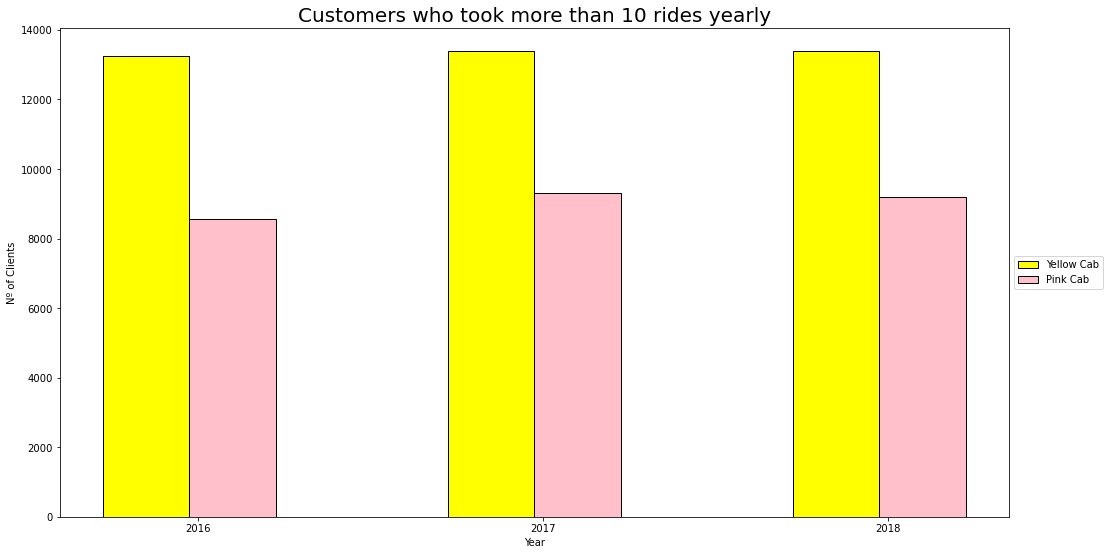

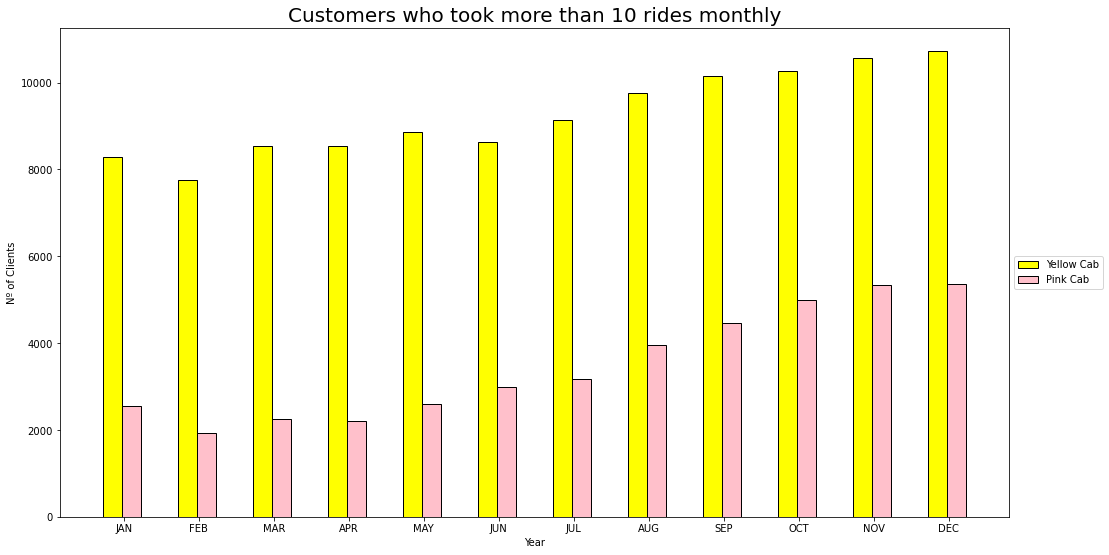

In [549]:
#plt.subplot(1,2,1)

plt.figure(figsize=(17,9))
X = np.arange(3)
plt.bar(X+0.00,yel_10_q,color='yellow', label='Yellow Cab', width= 0.25,edgecolor='black')
plt.bar(X+0.25,pink_10_q,color='pink',label='Pink Cab',width = 0.25,edgecolor='black')
plt.xticks(X+0.15,['2016','2017','2018'])
leg=plt.gca().legend(loc='center left',bbox_to_anchor = (1,0.5))
plt.setp(leg.get_texts(), color='black')
plt.title('Customers who took more than 10 rides yearly',fontsize=20)
plt.ylabel('Nº of Clients')
plt.xlabel('Year')
plt.show()

#plt.subplot(1,2,2)

plt.figure(figsize=(17,9))
X = np.arange(12)
plt.bar(X+0.00,yel_10_q_mth,color='yellow', label='Yellow Cab', width= 0.25,edgecolor='black')
plt.bar(X+0.25,pink_10_q_mth,color='pink',label='Pink Cab',width = 0.25,edgecolor='black')
plt.xticks(X+0.15,['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'])
leg=plt.gca().legend(loc='center left',bbox_to_anchor = (1,0.5))
plt.setp(leg.get_texts(), color='black')
plt.title('Customers who took more than 10 rides monthly',fontsize=20)
plt.ylabel('Nº of Clients')
plt.xlabel('Year')
plt.show()

### Retained customers  v/s Total customers

In [551]:
print("Customer retation percentage (v/s Total) - Yellow Cab - 10 or more travels per year")
print(yel_10_q/yel_cust_uniq_y)

print("Customer retation percentage (v/s Total) - Pink Cab - 10 or more travels per year")
print(pink_10_q/pink_cust_uniq_y)

print("Customer retation percentage (v/s Total) - Yellow Cab - 10 or more travels per month")
print(yel_10_q_mth/yel_cust_uniq_m)

print("Customer retation percentage (v/s Total) - Pink Cab - 10 or more travels per month")
print(pink_10_q_mth/pink_cust_uniq_m)


Customer retation percentage (v/s Total) - Yellow Cab - 10 or more travels per year
Year
2016   0.51
2017   0.48
2018   0.49
Name: Customer ID, dtype: float64
Customer retation percentage (v/s Total) - Pink Cab - 10 or more travels per year
Year
2016   0.51
2017   0.50
2018   0.50
Name: Customer ID, dtype: float64
Customer retation percentage (v/s Total) - Yellow Cab - 10 or more travels per month
Month_int
1    0.71
2    0.75
3    0.74
4    0.73
5    0.73
6    0.70
7    0.69
8    0.67
9    0.66
10   0.64
11   0.63
12   0.62
Name: Customer ID, dtype: float64
Customer retation percentage (v/s Total) - Pink Cab - 10 or more travels per month
Month_int
1    0.58
2    0.60
3    0.58
4    0.58
5    0.58
6    0.58
7    0.55
8    0.58
9    0.56
10   0.59
11   0.58
12   0.59
Name: Customer ID, dtype: float64


### Customers with 10 or more travels per year

Both companies have similar rates. Al most the half of total customers take more than 10 cabs of the company  per year.

### Customers with 10 or more travels per month

Yellow Cab is stronger considering quantity of travels per month. 62% - 75% of customers (along the months of the yea) take more than 10 cabs of the company per month.



## Conclution

### Profits

Yellow Cab profits are higher in every dimension analysed. The only point to take into account, is that after profitability analysis, there are some cities (Pittsburgh, Nashville, Sacramento, Tucson, Chicago, Denver, Boston and Phoenix) representing the cities with the biggest non profitable travel rates. I am willing to say that Yellow Cab is aware of this, because 6 of these 8 cities, are some of the cities where Pink Cab has higher market share.

### Demand

Yellow Cab demand is higher in every dimension as well (consider the the few cities where Pink Cab has higher market share that we mentioned in the last paragraph).

Seasonability and the variation along the quarters/years follows a similar cycle, but the variations and changes of demand in Yellow Cab are more abrupt.

### Profitability

Considering the limited time, I chose to focus on analysing the profitability over 2 features : Age and Cities.

In Age, I partitioned them into age ranges 18-25, 26-40, 41-60 and 61+. The non profitable travel rate along the different ranges was almost the same (7%).

In Cities, as I already mentioned, there were different non profitable travel, with 8 cities at the bottom : Pittsburgh, Nashville, Sacramento, Tucson, Chicago, Denver, Boston and Phoenix.


### Customer retention

Anually: both companies are around a 50% of customer retention, considering anual retention as 10 travels per year.

Monthly: Yellow Cab is superior with a 68% retention average over the months, and Pink Yellow still 50%.



### Final state

Considering all the information we had, and the analysis developed over the weeks, I am allow to say that it would be recommended to invest on Yellow Cab Company.